# Problem Statement



CarIns is a startup that provides insurance for cars. It is one of the best car insurance brands known for the highest claim settlement ratio. It was launched back in Oct 2020 and acquired its initial policyholders by providing a hassle-free claim process, instant policy issuance, and claim settlements at minimum coverages.


As it's a fast growing startup, the company would like to optimize the cost of the insurance by identifying the policyholders who are more likely to claim in the next 6 months. 

Now the company would like to use Data Science to identify the policyholders whose chances of filing a claim are high in the next 6 months. The company challenges the Data Science community to build a high-performance algorithm to predict if the policyholder will file a claim in the next 6 months or not based on the set of car and policy features.

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"]=[20,12]
import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns",50)

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
train.shape,test.shape

((58592, 44), (39063, 43))

In [3]:
#combine data

combined= pd.concat([train,test], ignore_index=True)
combined.shape

(97655, 44)

In [4]:
combined.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0.0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0.0


In [5]:
#curate the list of categorical variables


combined.select_dtypes(include="object").columns

Index(['policy_id', 'area_cluster', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'transmission_type',
       'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert'],
      dtype='object')

In [6]:
cat = ['area_cluster', 'segment', 'model', 'fuel_type', 'engine_type', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'transmission_type',
       'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert','is_claim']
len(cat)

26

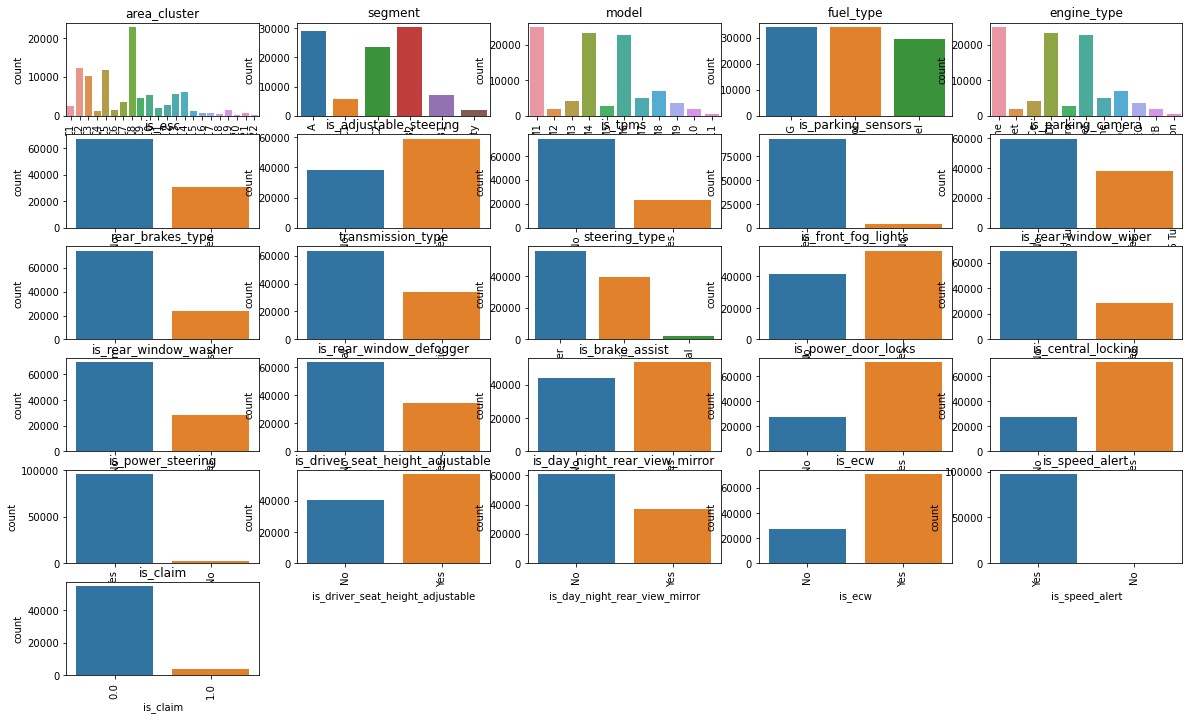

In [7]:
nrows=6
ncols=5
iterator=1

for i in cat:
    plt.subplot(nrows, ncols, iterator)
    sns.countplot(combined[i])
    iterator+=1
    plt.title(i)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#steering type- yes, break assist is given
#central locking is available and driver seat height is adjustable
#doors have power, ecw is there
#target variable is highly imbalanced

<AxesSubplot:>

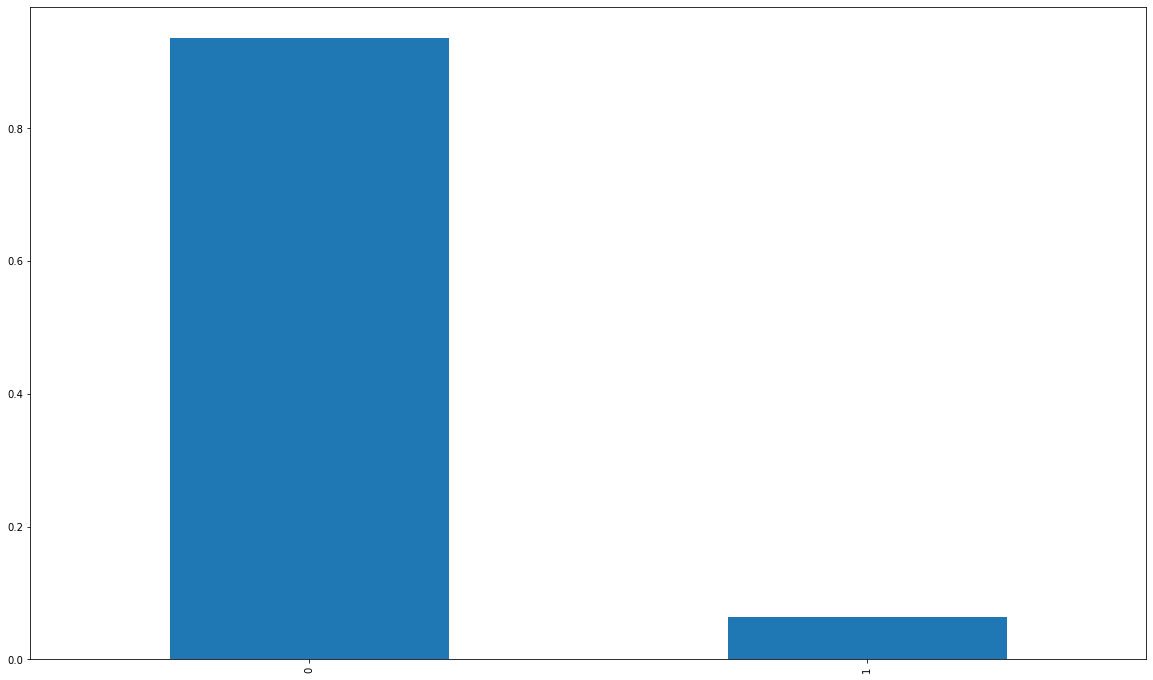

In [8]:
train["is_claim"].value_counts(normalize=True).plot(kind="bar")

In [9]:
#describing clusters

train[train["is_claim"]==1].describe(include="all")

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
count,3748,3748.000000,3748.000000,3748.000000,3748,3748.000000,3748.000000,3748,3748,3748,3748,3748,3748,3748.000000,3748,3748,3748,3748,3748,3748,3748.000000,3748.000000,3748,3748.000000,3748,3748.000000,3748.000000,3748.000000,3748.000000,3748.000000,3748,3748,3748,3748,3748,3748,3748,3748,3748,3748,3748,3748,3748.000000,3748.0
unique,3748,NaN,NaN,NaN,22,NaN,NaN,6,11,3,9,9,11,NaN,2,2,2,2,2,2,NaN,NaN,2,NaN,3,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,2,2,2,2,2,NaN,NaN
top,ID00013,NaN,NaN,NaN,C8,NaN,NaN,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,NaN,No,Yes,No,Yes,No,Drum,NaN,NaN,Manual,NaN,Power,NaN,NaN,NaN,NaN,NaN,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,NaN,NaN
freq,1,NaN,NaN,NaN,954,NaN,NaN,1256,939,1363,1220,1220,939,NaN,2551,2370,2847,3620,2290,2847,NaN,NaN,2438,NaN,2078,NaN,NaN,NaN,NaN,NaN,2254,2646,2646,2418,2136,2757,2757,3675,2269,2267,2757,3733,NaN,NaN
mean,NaN,0.736002,0.063311,0.479966,NaN,17623.820438,1.761740,NaN,NaN,NaN,NaN,NaN,NaN,3.156617,NaN,NaN,NaN,NaN,NaN,NaN,1170.177161,3.651814,NaN,5.244397,NaN,4.855269,3858.214514,1676.498666,1552.719050,1388.441302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.780149,1.0
std,NaN,0.389169,0.053058,0.126140,NaN,16130.125259,1.139372,NaN,NaN,NaN,NaN,NaN,NaN,1.840379,NaN,NaN,NaN,NaN,NaN,NaN,263.939687,0.476459,NaN,0.429786,NaN,0.226001,308.721465,110.765822,78.119627,210.556478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.386084,0.0
min,NaN,0.002850,0.000000,0.288462,NaN,290.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,796.000000,3.000000,NaN,5.000000,NaN,4.500000,3445.000000,1475.000000,1475.000000,1051.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.0
25%,NaN,0.399630,0.020000,0.384615,NaN,6112.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,998.000000,3.000000,NaN,5.000000,NaN,4.600000,3655.000000,1515.000000,1490.000000,1185.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.0
50%,NaN,0.833247,0.050000,0.461538,NaN,8794.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,1197.000000,4.000000,NaN,5.000000,NaN,4.800000,3845.000000,1735.000000,1530.000000,1335.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.0
75%,NaN,1.084144,0.100000,0.557692,NaN,27003.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,1493.000000,4.000000,NaN,5.000000,NaN,5.000000,3995.000000,1755.000000,1635.000000,1510.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,1.0


In [10]:
#numerical data

combined.select_dtypes(include=np.number).columns

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'displacement', 'cylinder',
       'gear_box', 'turning_radius', 'length', 'width', 'height',
       'gross_weight', 'ncap_rating', 'is_claim'],
      dtype='object')

In [11]:
combined.ncap_rating.unique()

array([0, 2, 3, 5, 4], dtype=int64)

In [12]:
#converting ncap as category

combined["ncap_rating"]= combined["ncap_rating"].astype("object")

In [13]:
num=[ 'age_of_car', 'age_of_policyholder',
       'population_density', 'displacement',
       'turning_radius', 'length', 'width', 'height', 'policy_tenure',
       'gross_weight']
len(num)

10

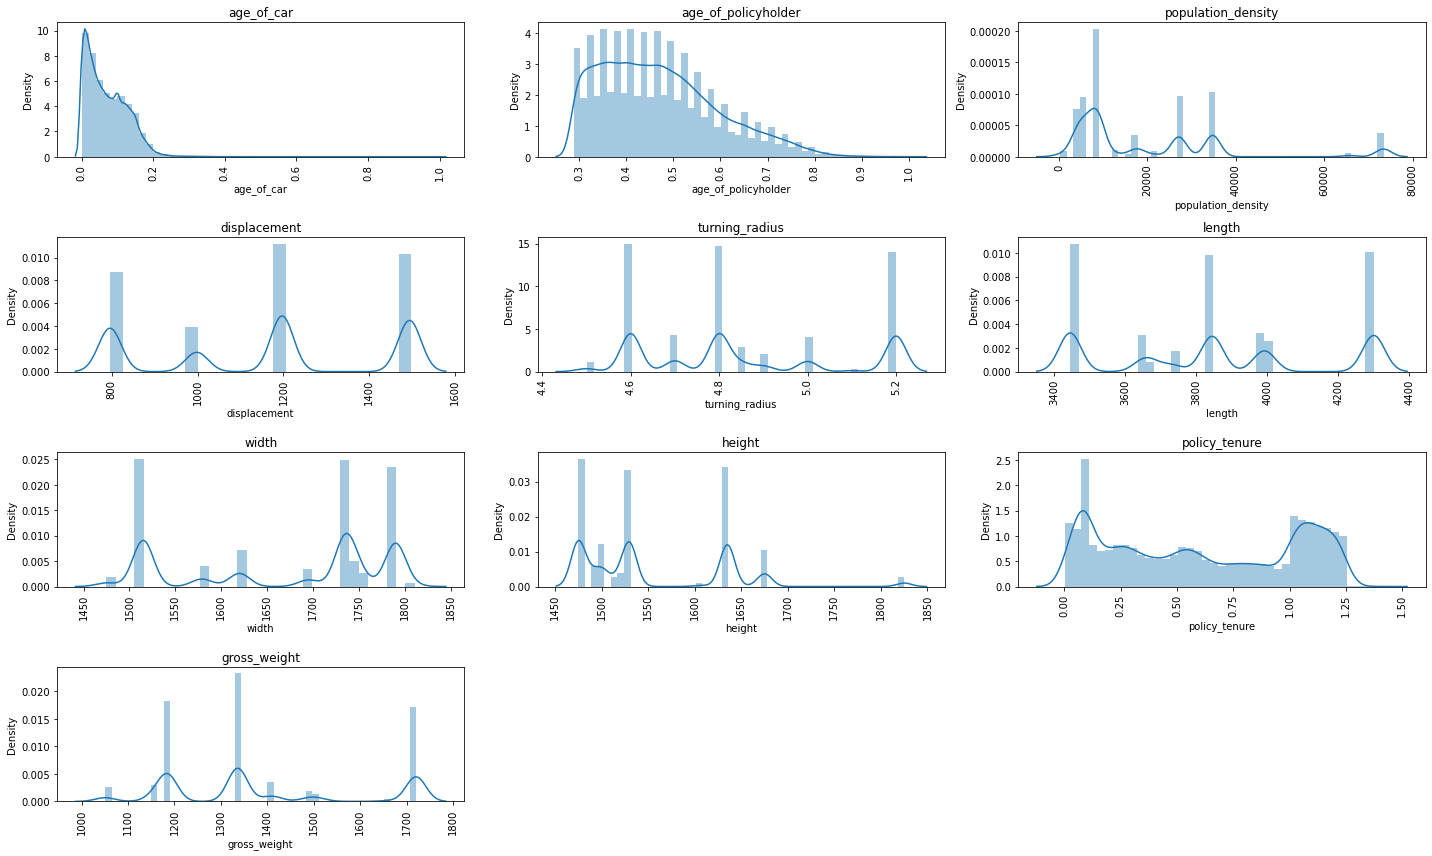

In [14]:
nrows=4
ncols=3
iterator=1

for i in num:
    plt.subplot(nrows, ncols, iterator)
    sns.distplot(combined[i])
    iterator+=1
    plt.title(i)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [15]:
combined.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,is_claim
count,97655.000000,97655.000000,97655.000000,97655.00000,97655.000000,97655.000000,97655.000000,97655.000000,97655.000000,97655.000000,97655.000000,97655.000000,97655.000000,97655.000000,58592.000000
mean,0.611269,0.069508,0.469287,18822.60809,1.763586,3.138109,1161.655829,3.624423,5.245579,4.853024,3850.017715,1672.050187,1553.214500,1384.966750,0.063968
std,0.414494,0.056774,0.122560,17656.79257,1.135832,1.831993,266.560176,0.484274,0.430432,0.228059,311.745860,112.042508,79.385788,212.543007,0.244698
min,0.002735,0.000000,0.288462,290.00000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.000000,1051.000000,0.000000
25%,0.209729,0.020000,0.375000,6112.00000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.000000,1185.000000,0.000000
50%,0.573891,0.060000,0.451923,8794.00000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.000000,1335.000000,0.000000
75%,1.039740,0.110000,0.548077,27003.00000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.000000,1510.000000,0.000000
max,1.396641,1.000000,1.000000,73430.00000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.000000,1720.000000,1.000000


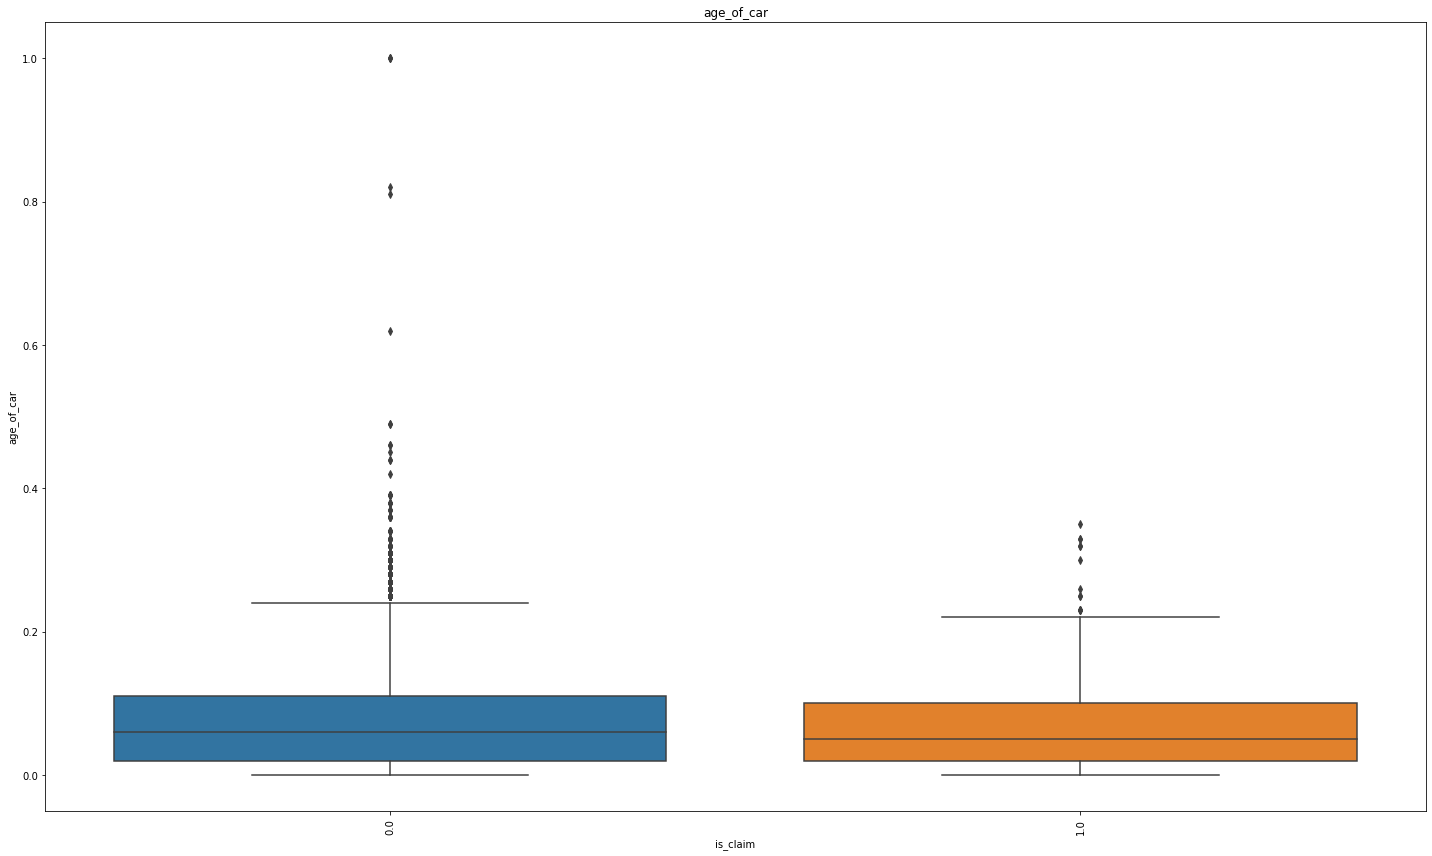

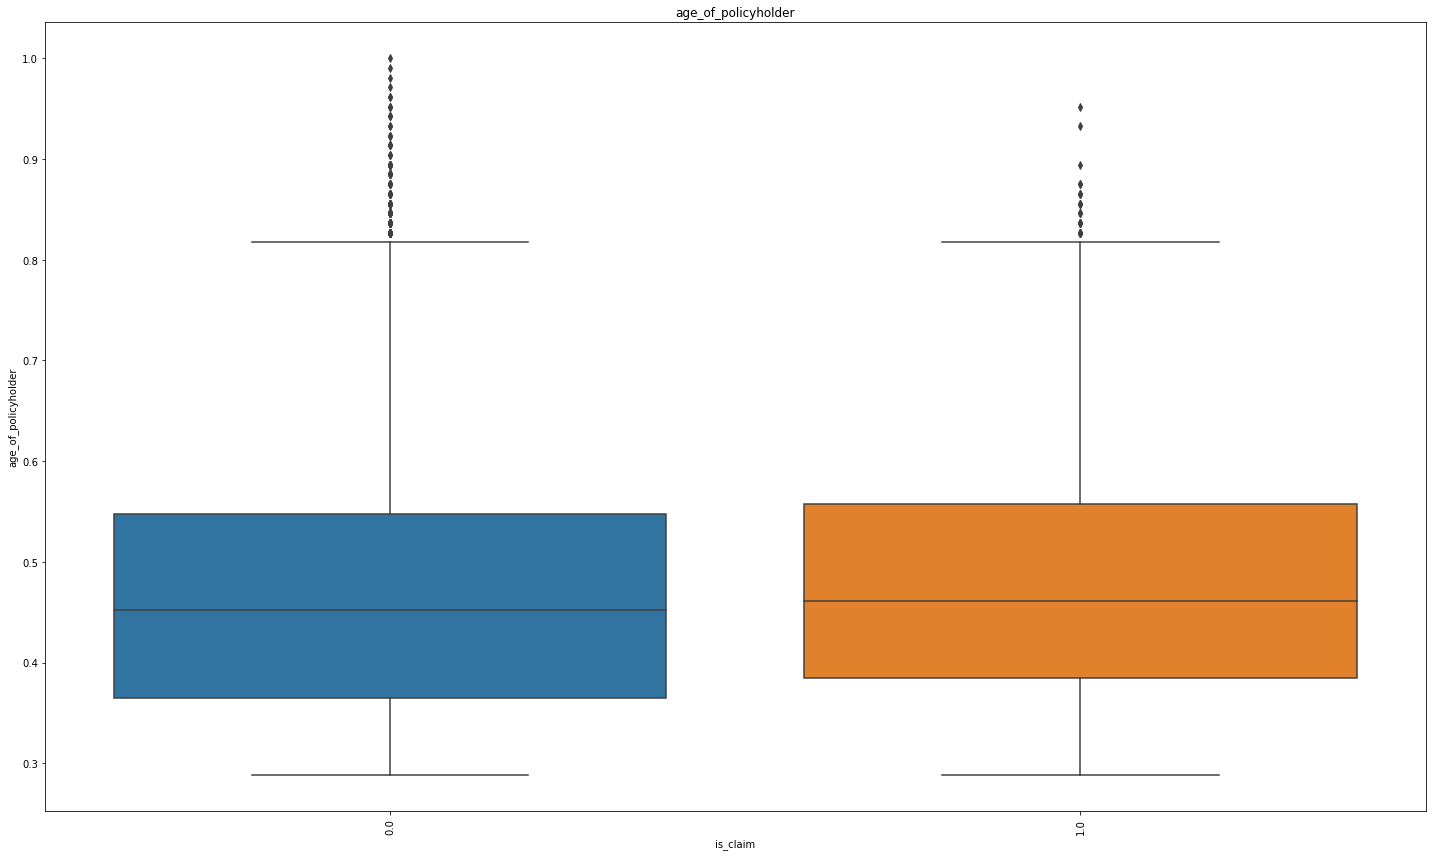

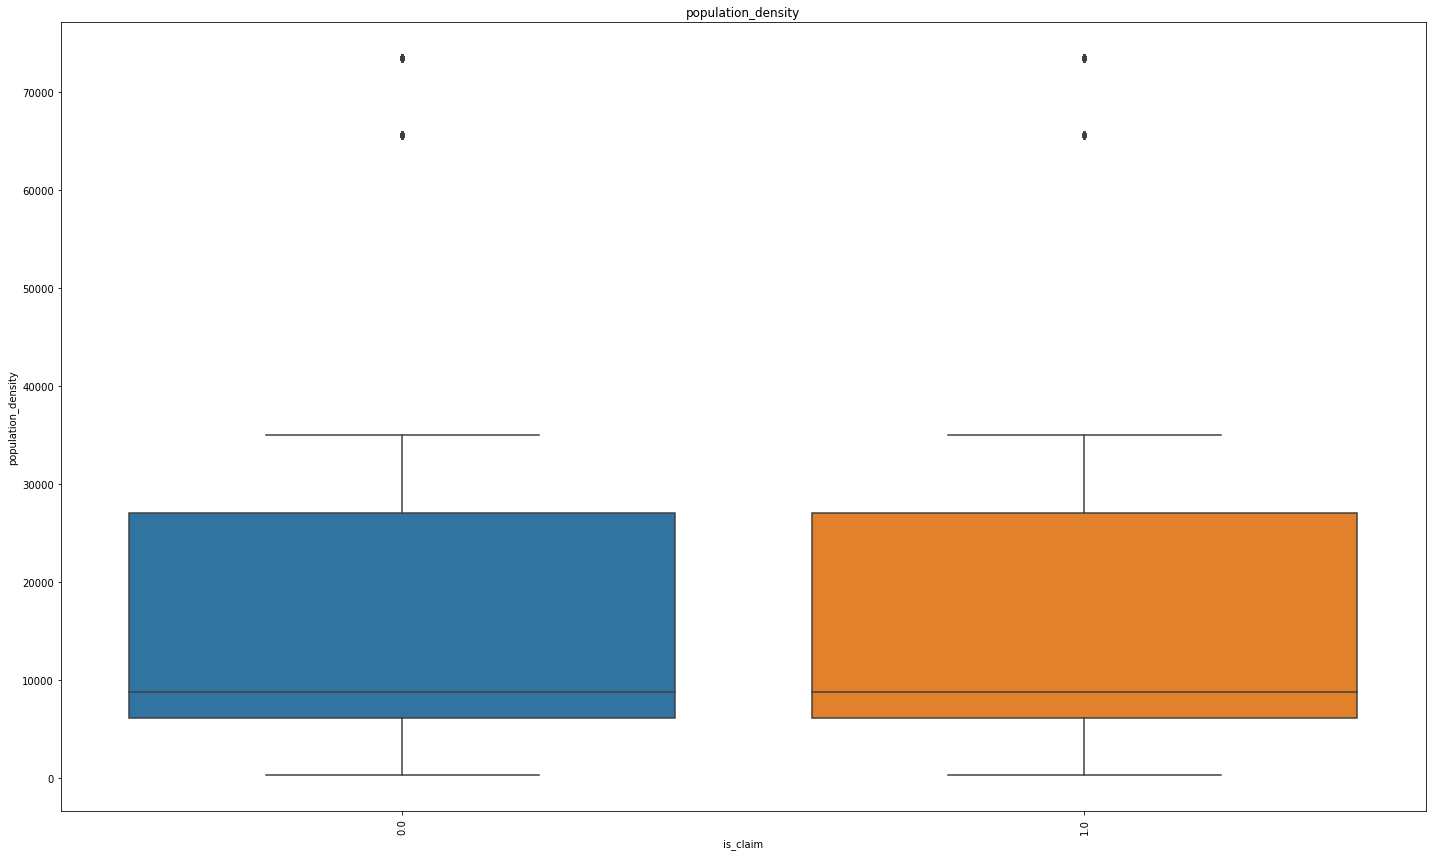

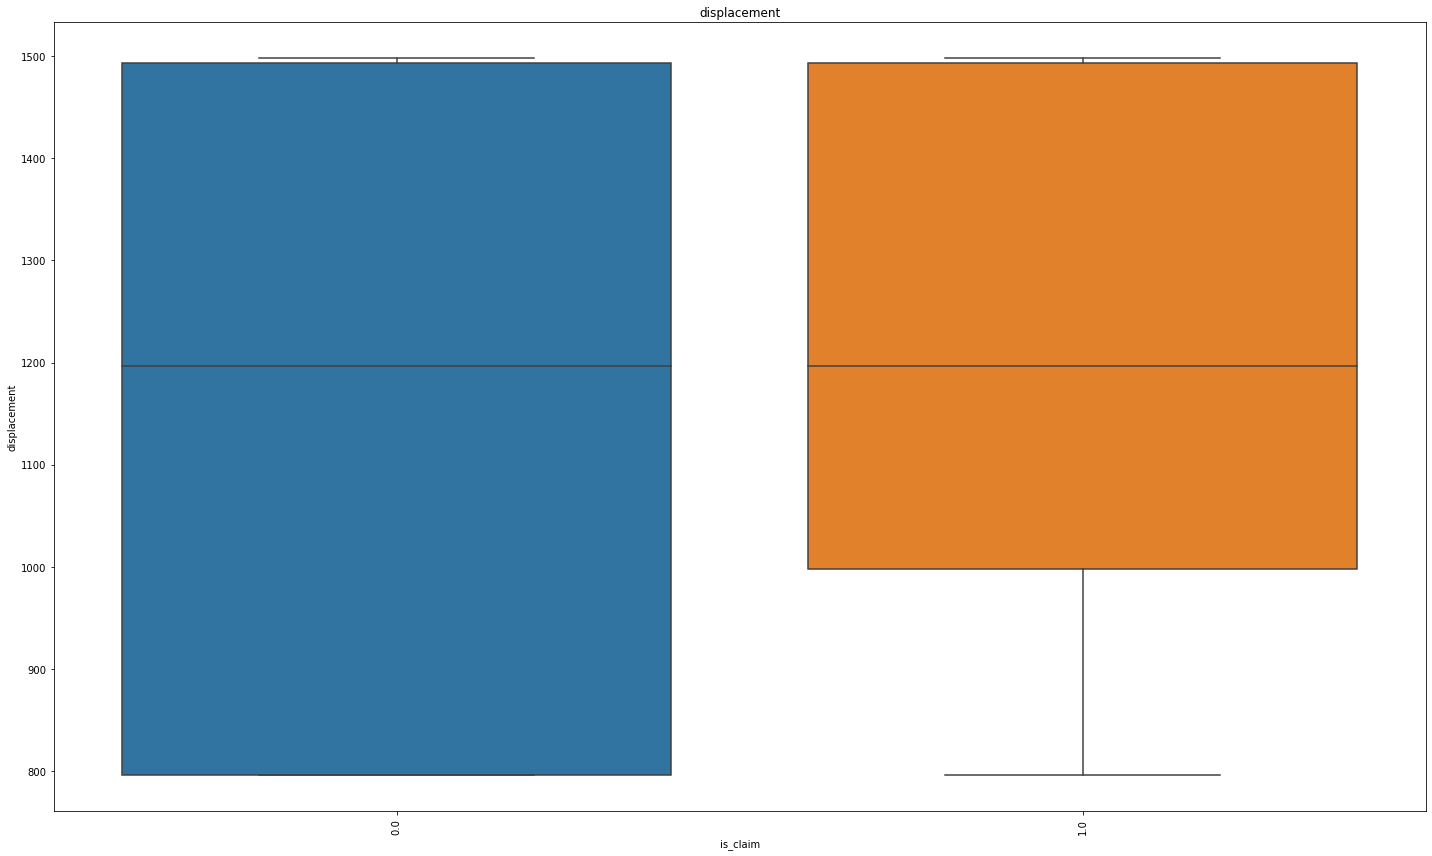

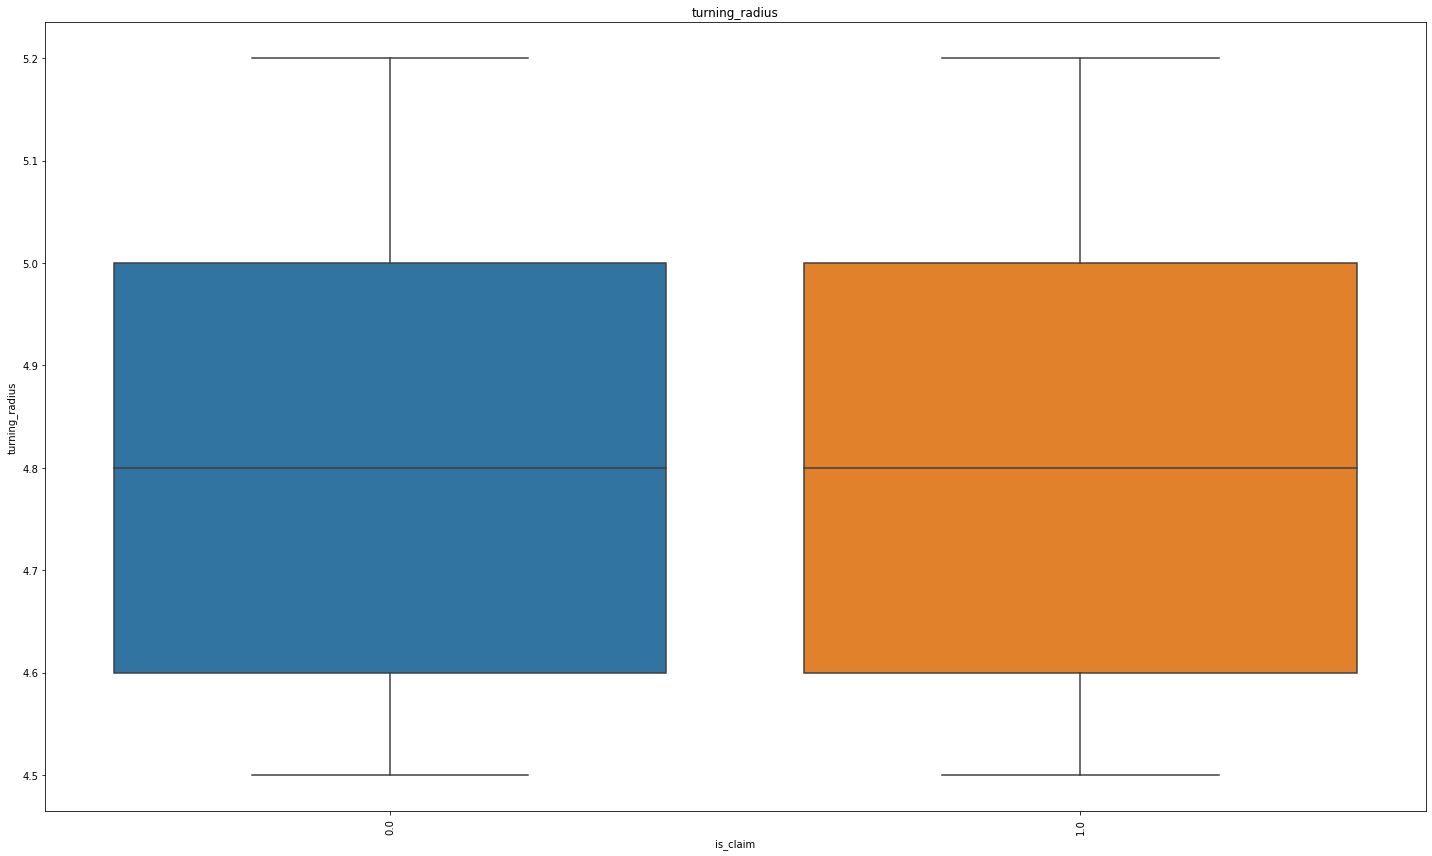

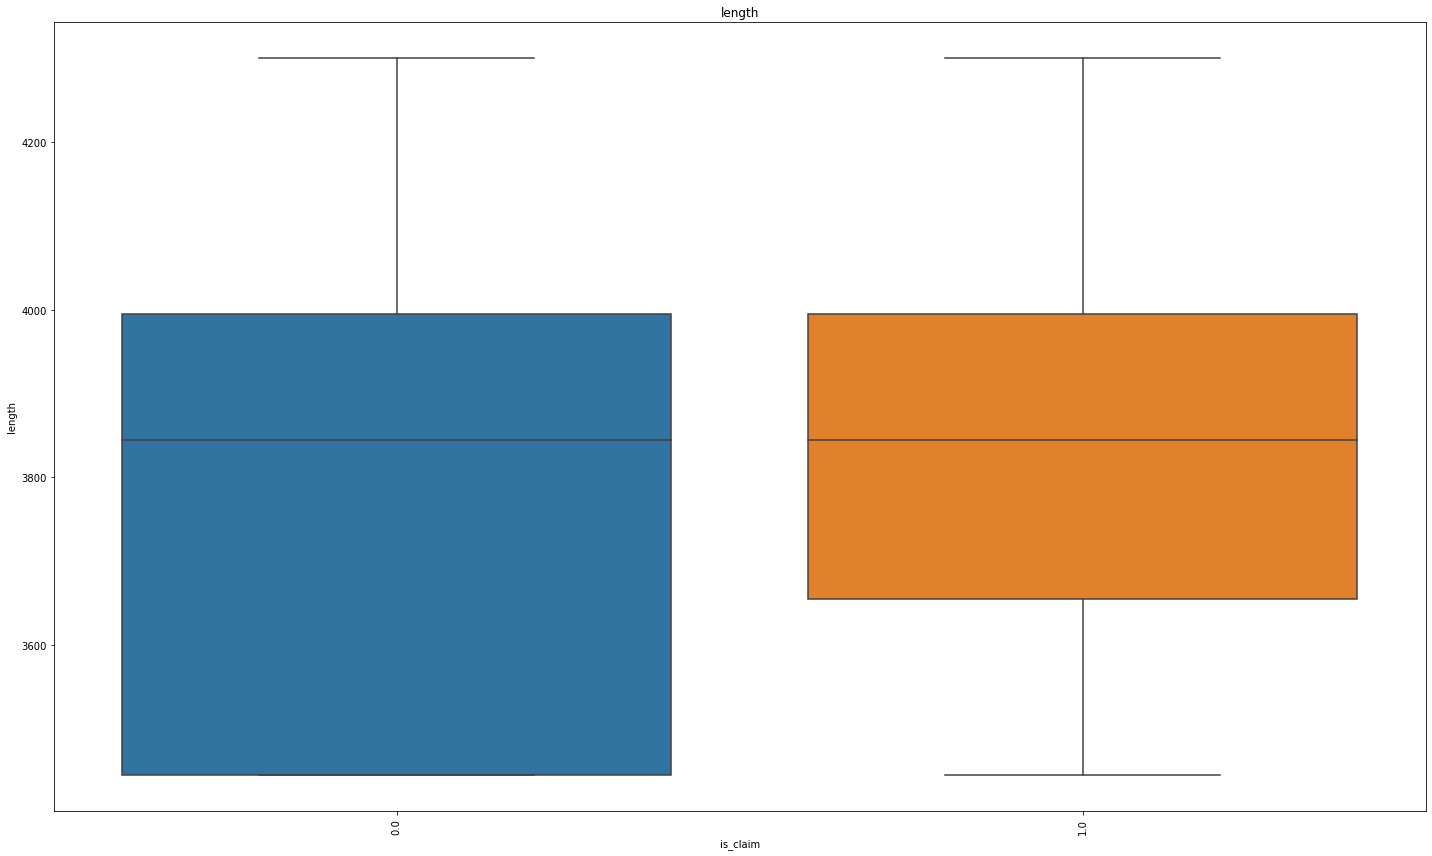

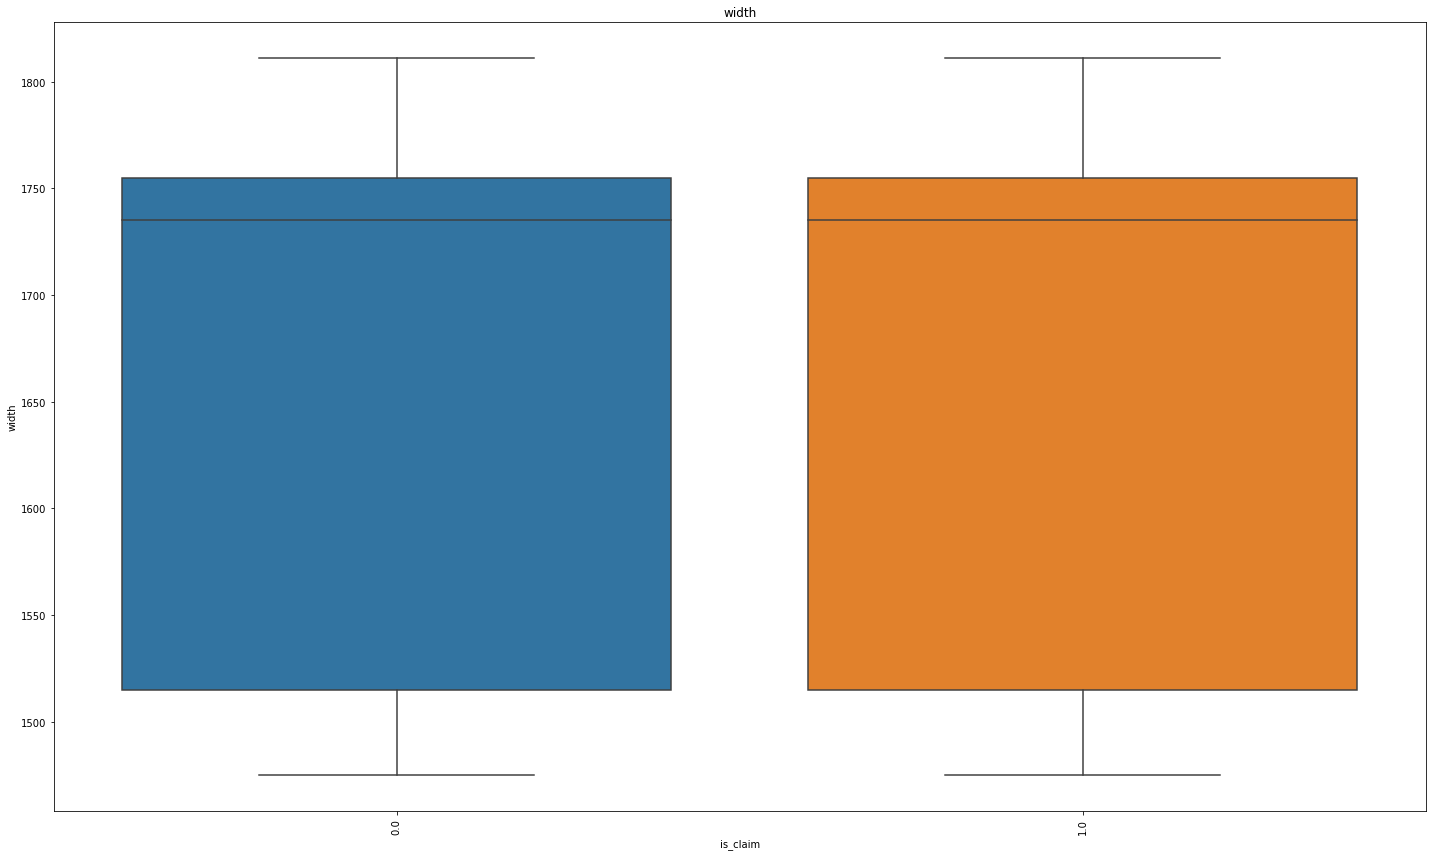

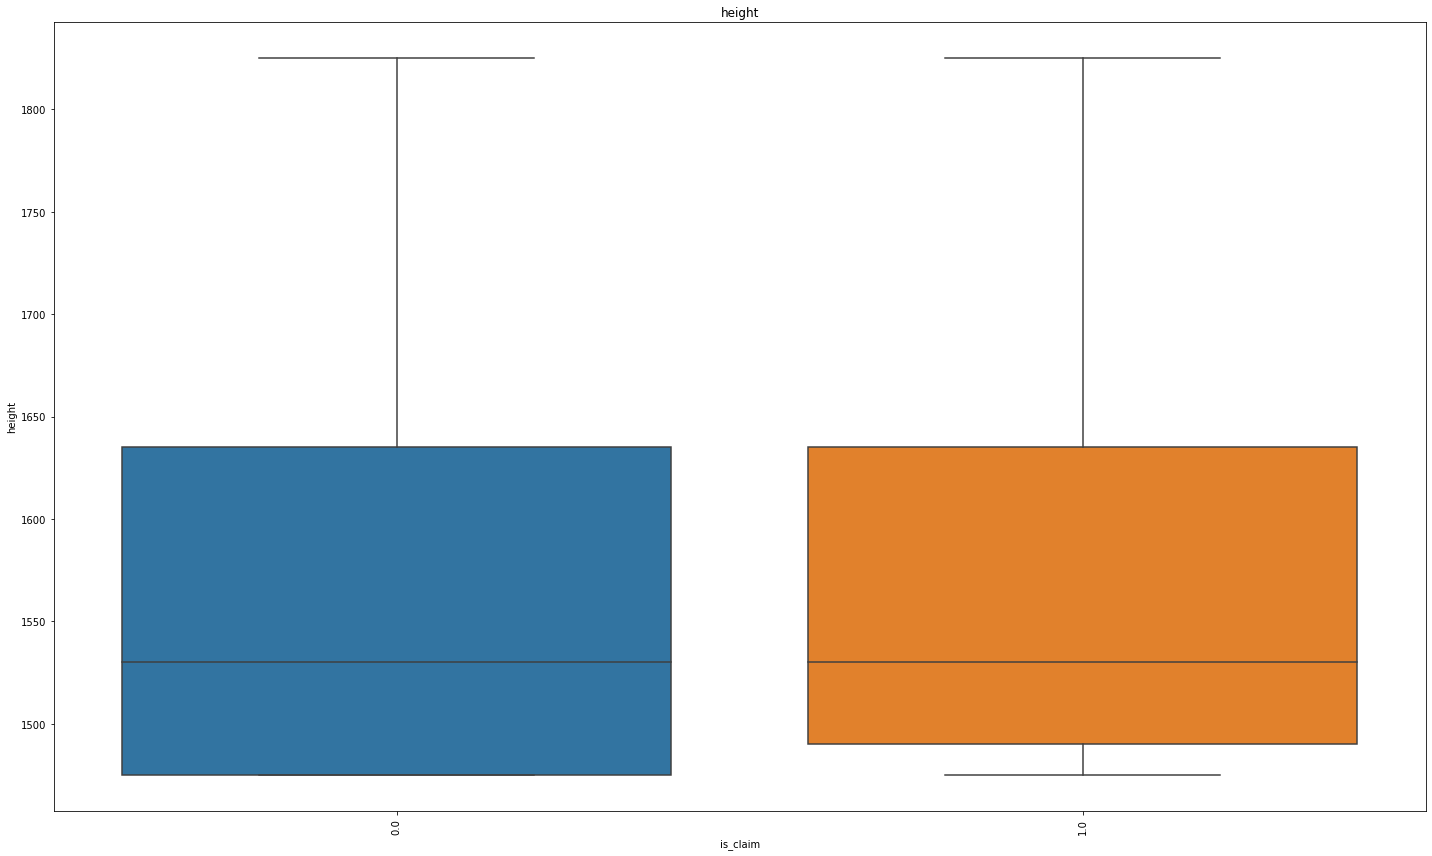

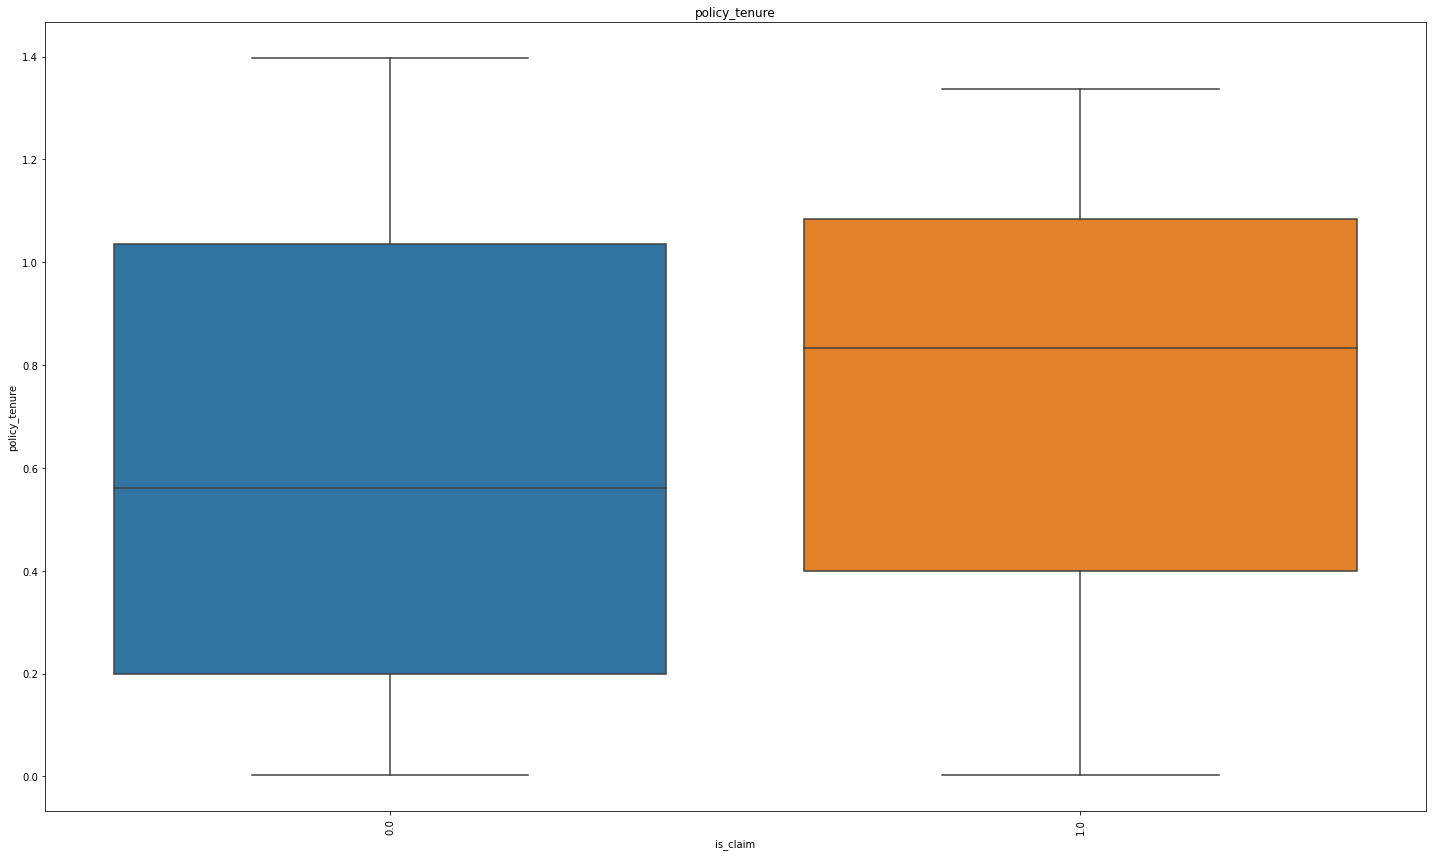

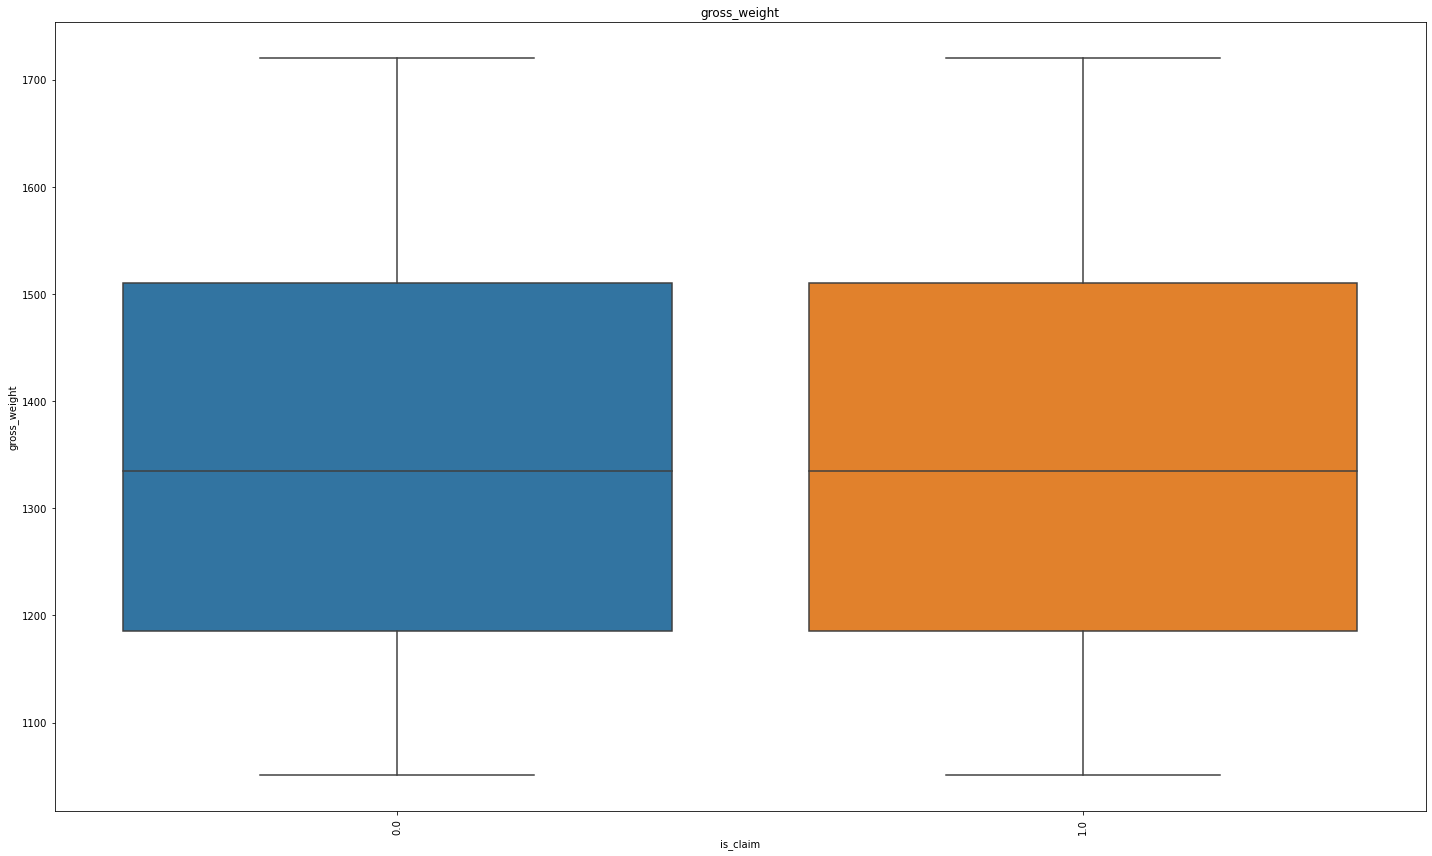

In [16]:
# Bivariate Analysis


nrows=10
ncols=3
iterator=1


for i in num:
    #plt.figure(figsize=(25,12))
    #plt.subplot(nrows, ncols, iterator)
    sns.boxplot(combined["is_claim"],combined[i])
    #iterator+=1
    plt.title(i)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

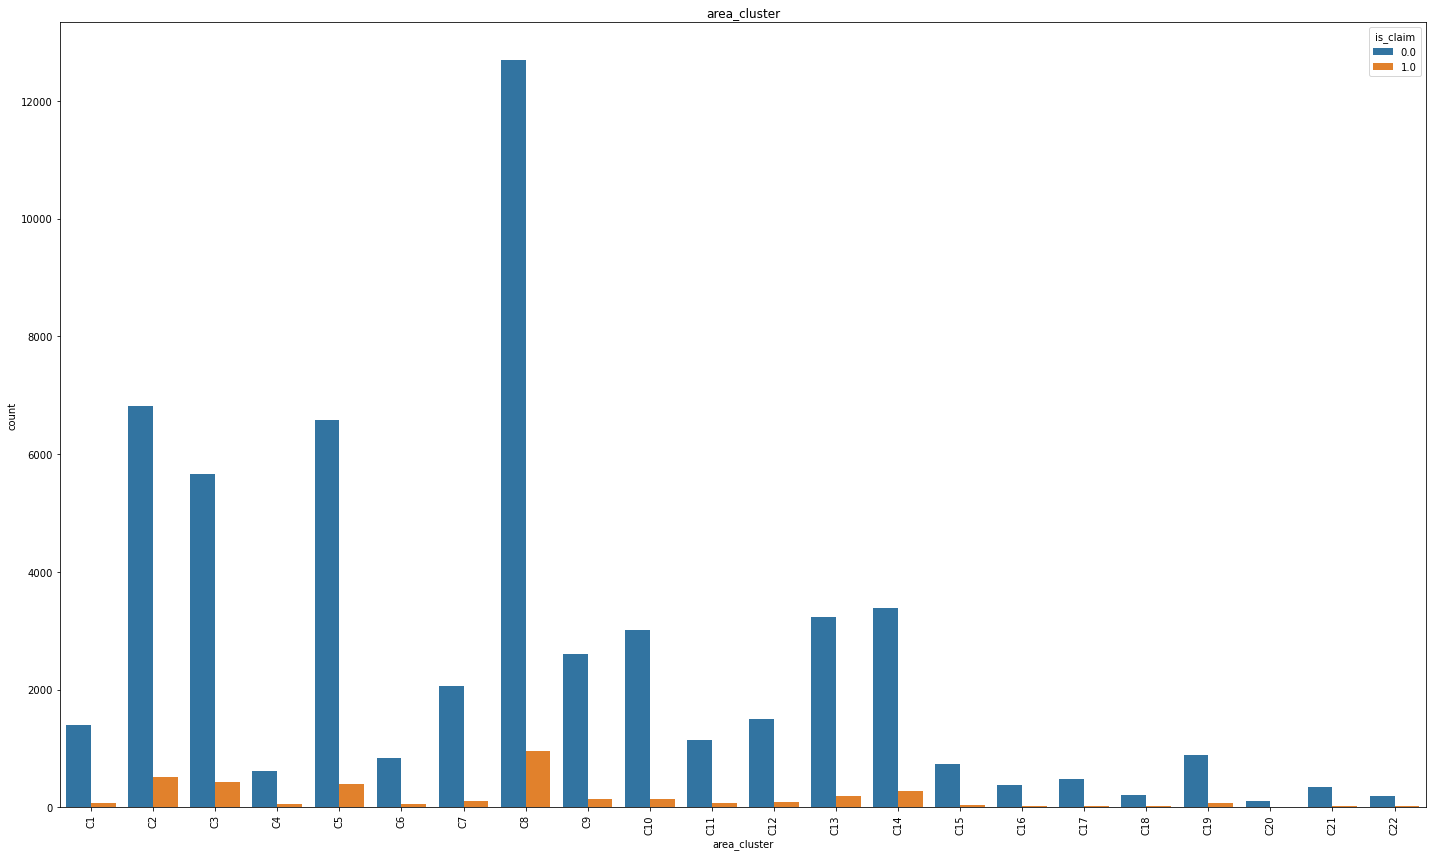

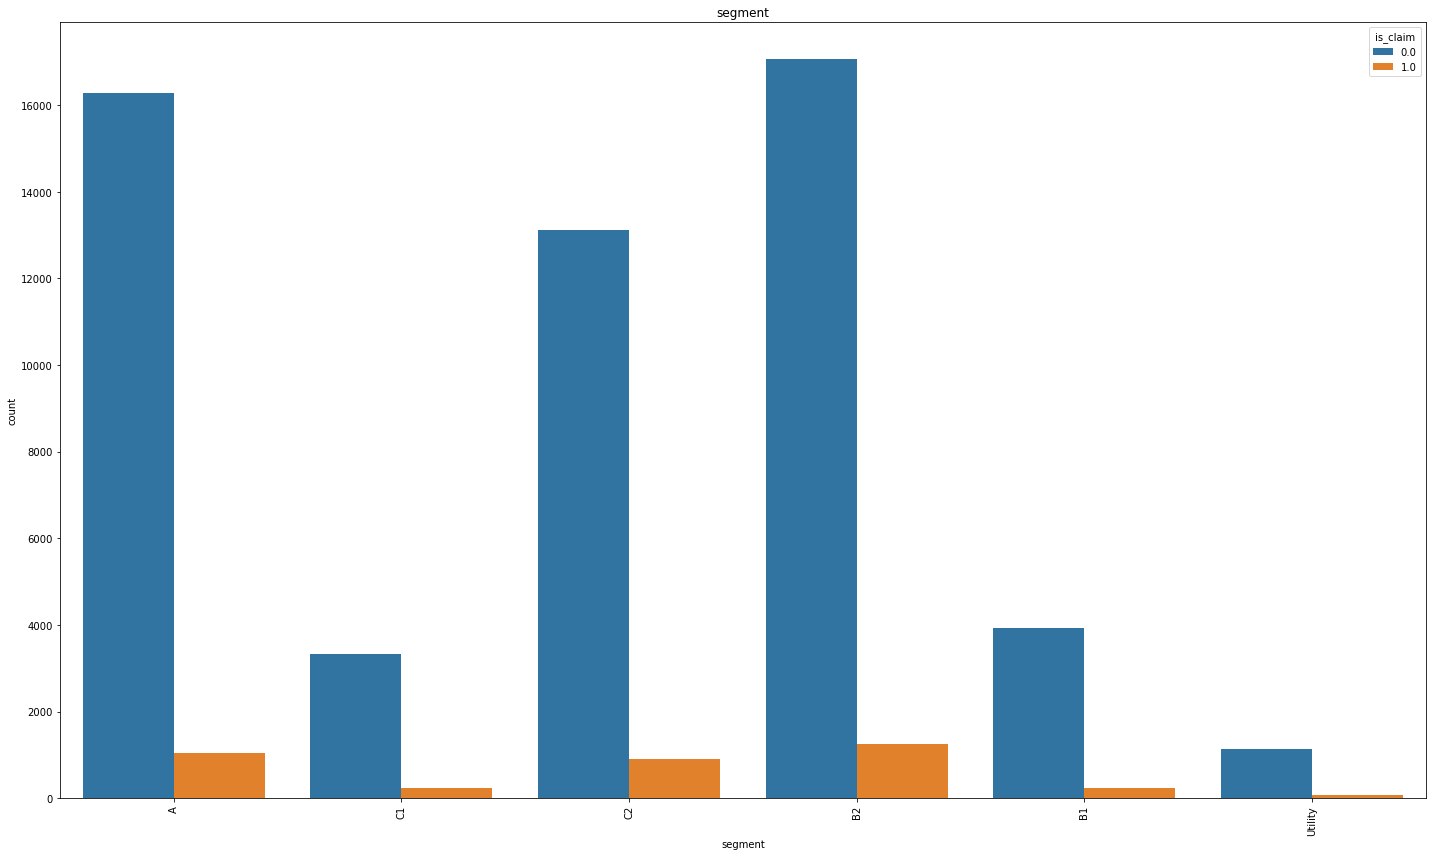

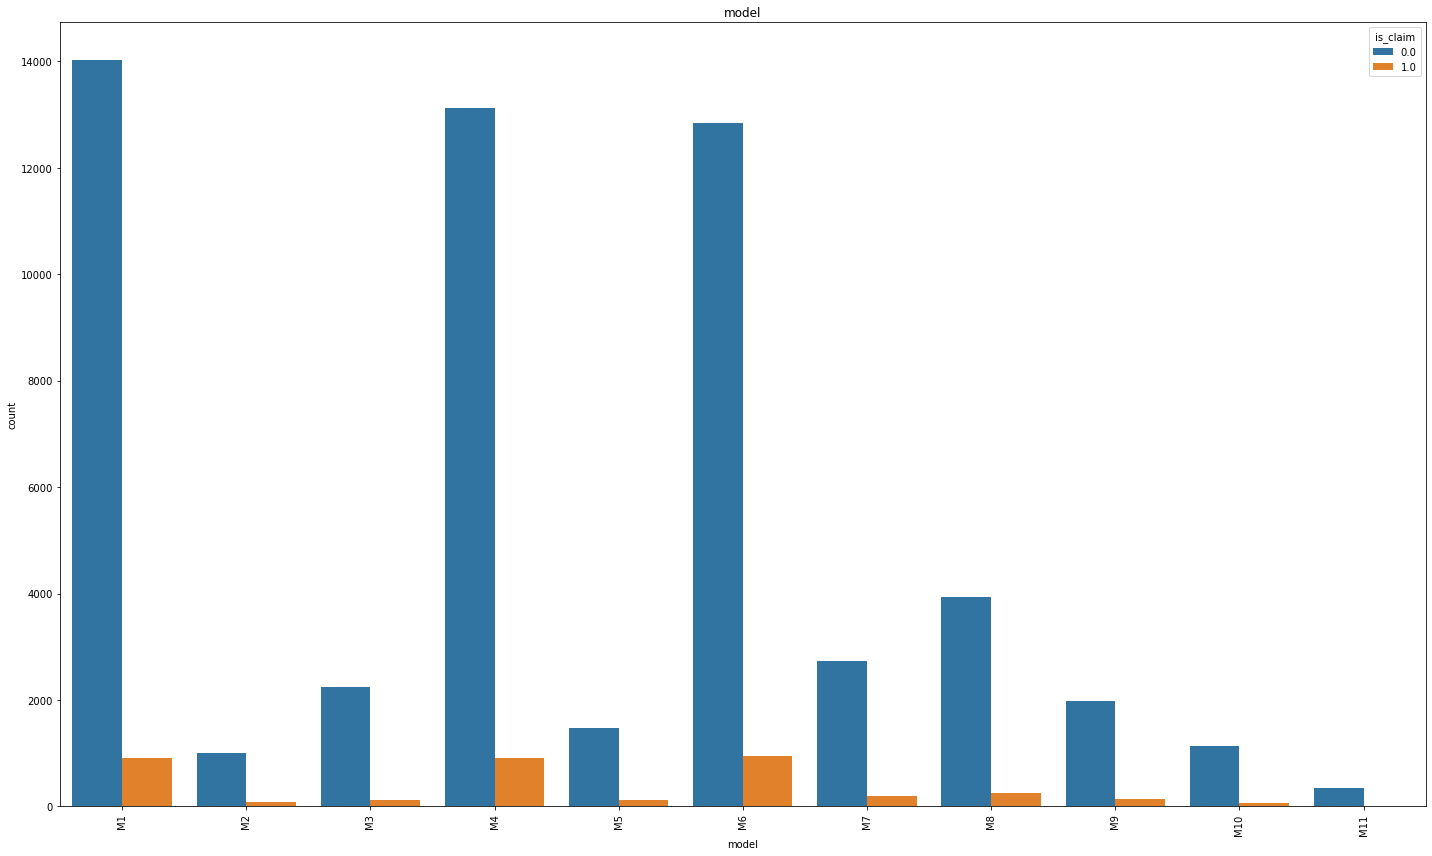

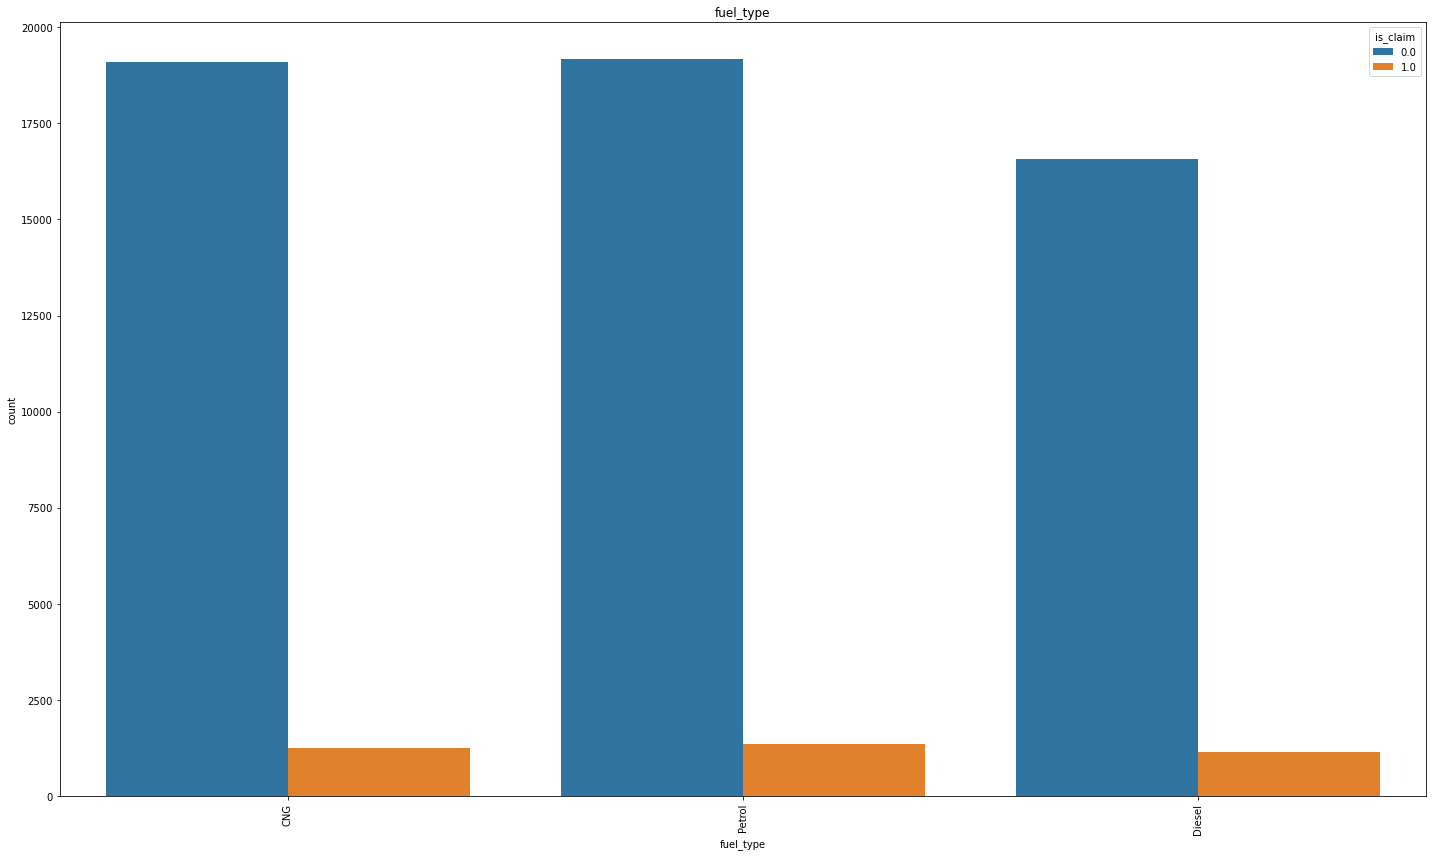

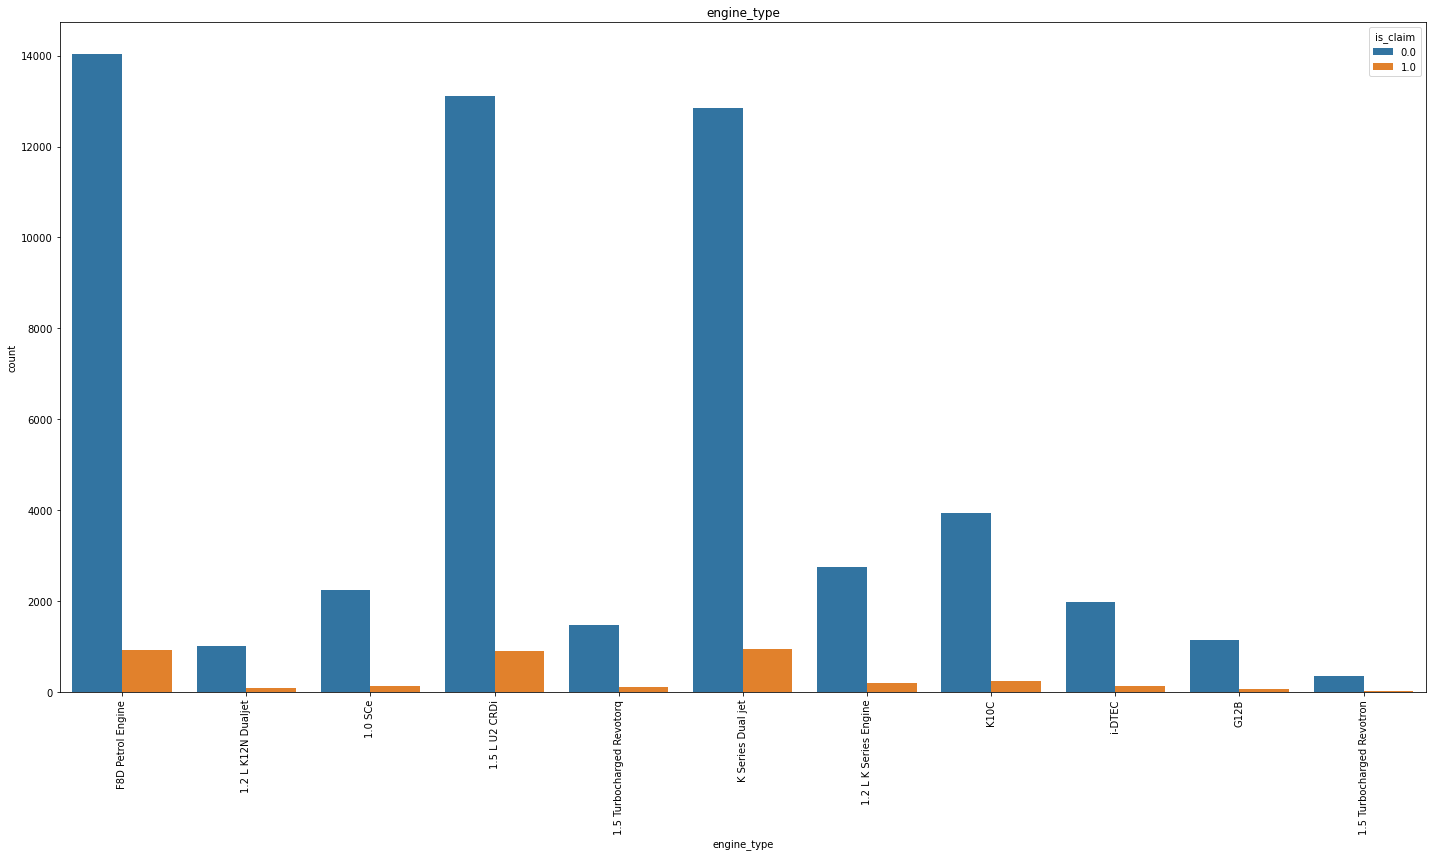

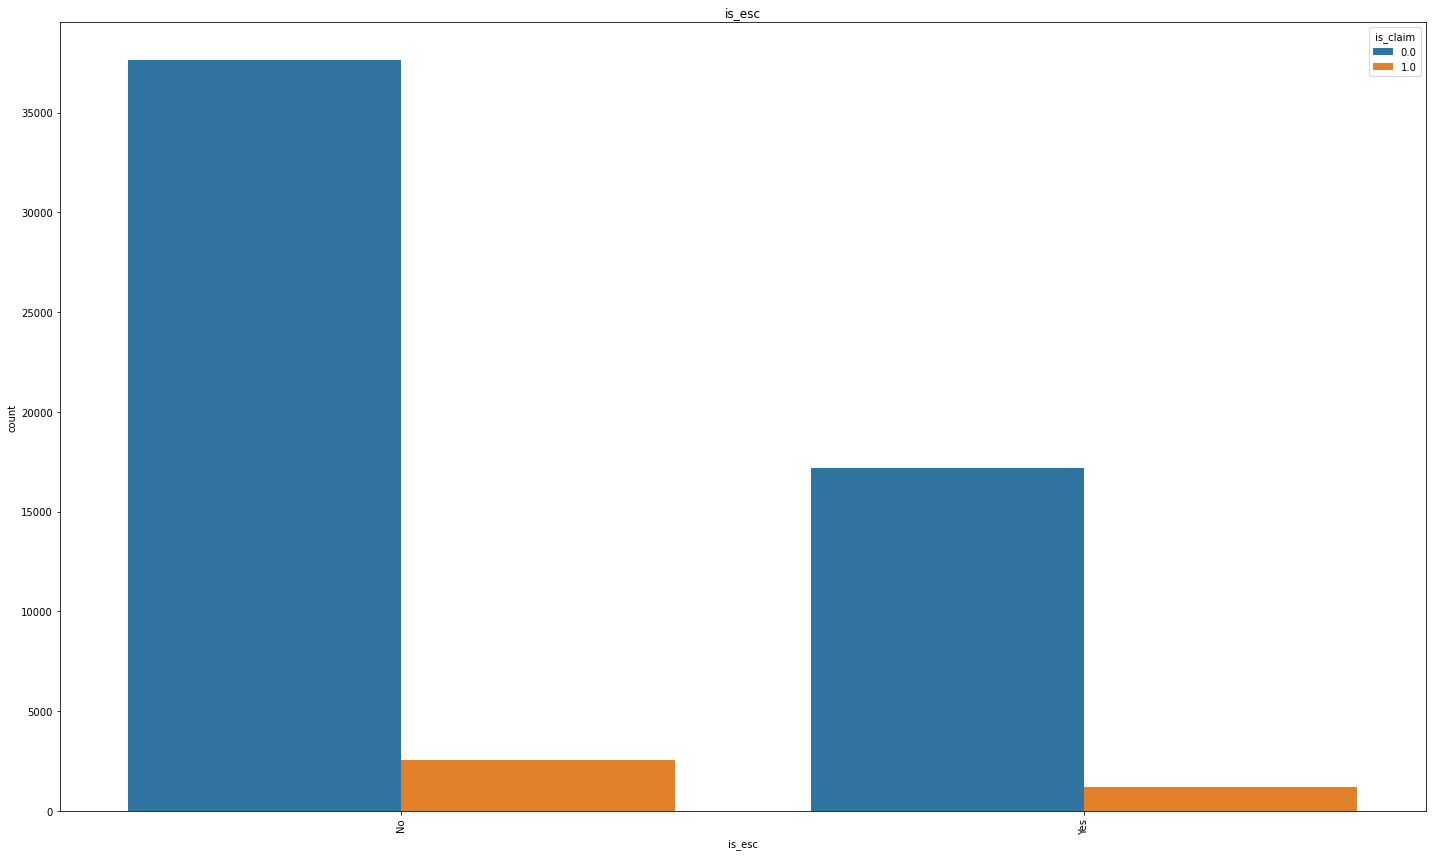

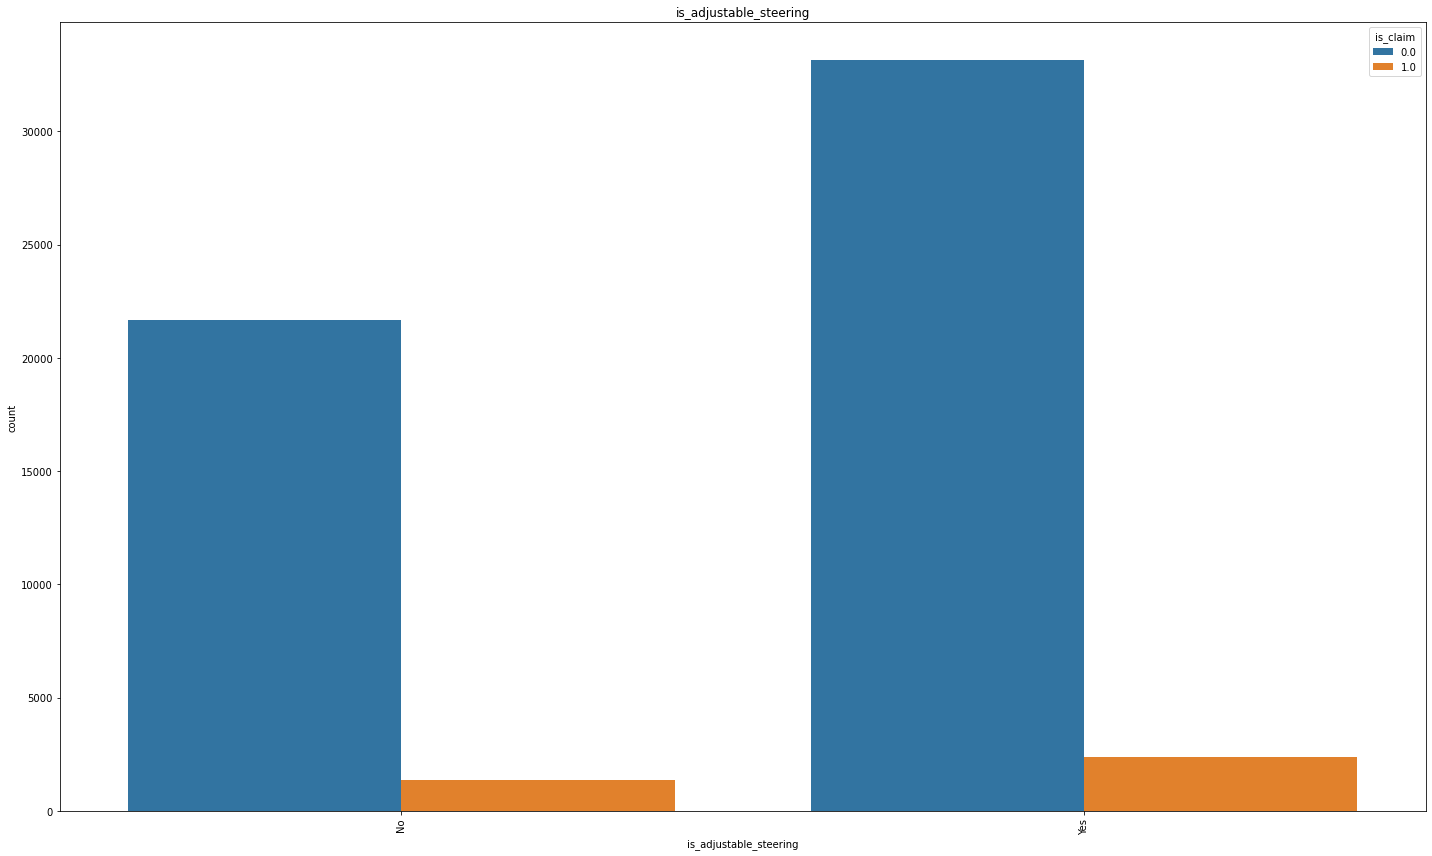

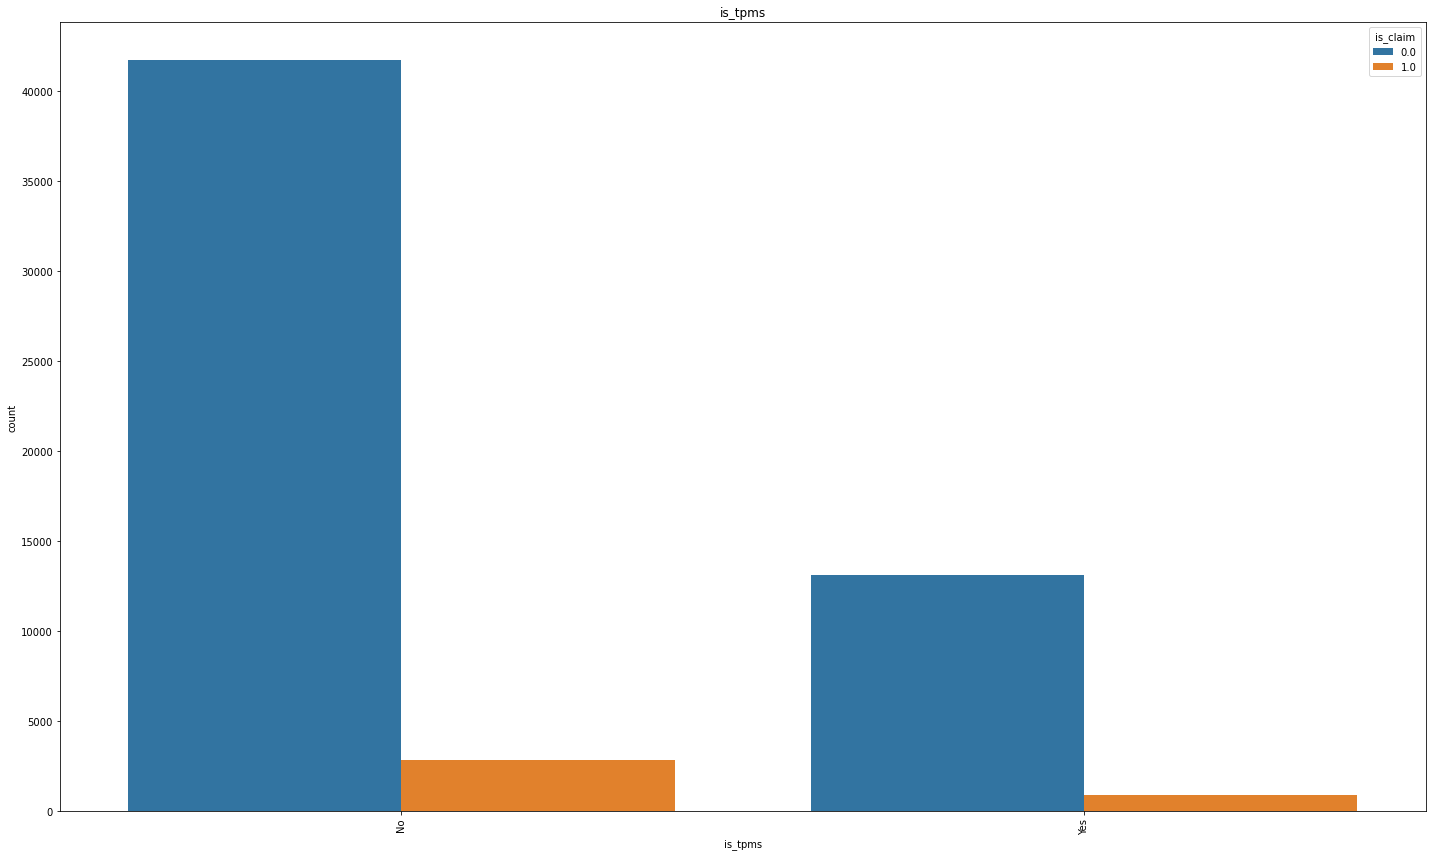

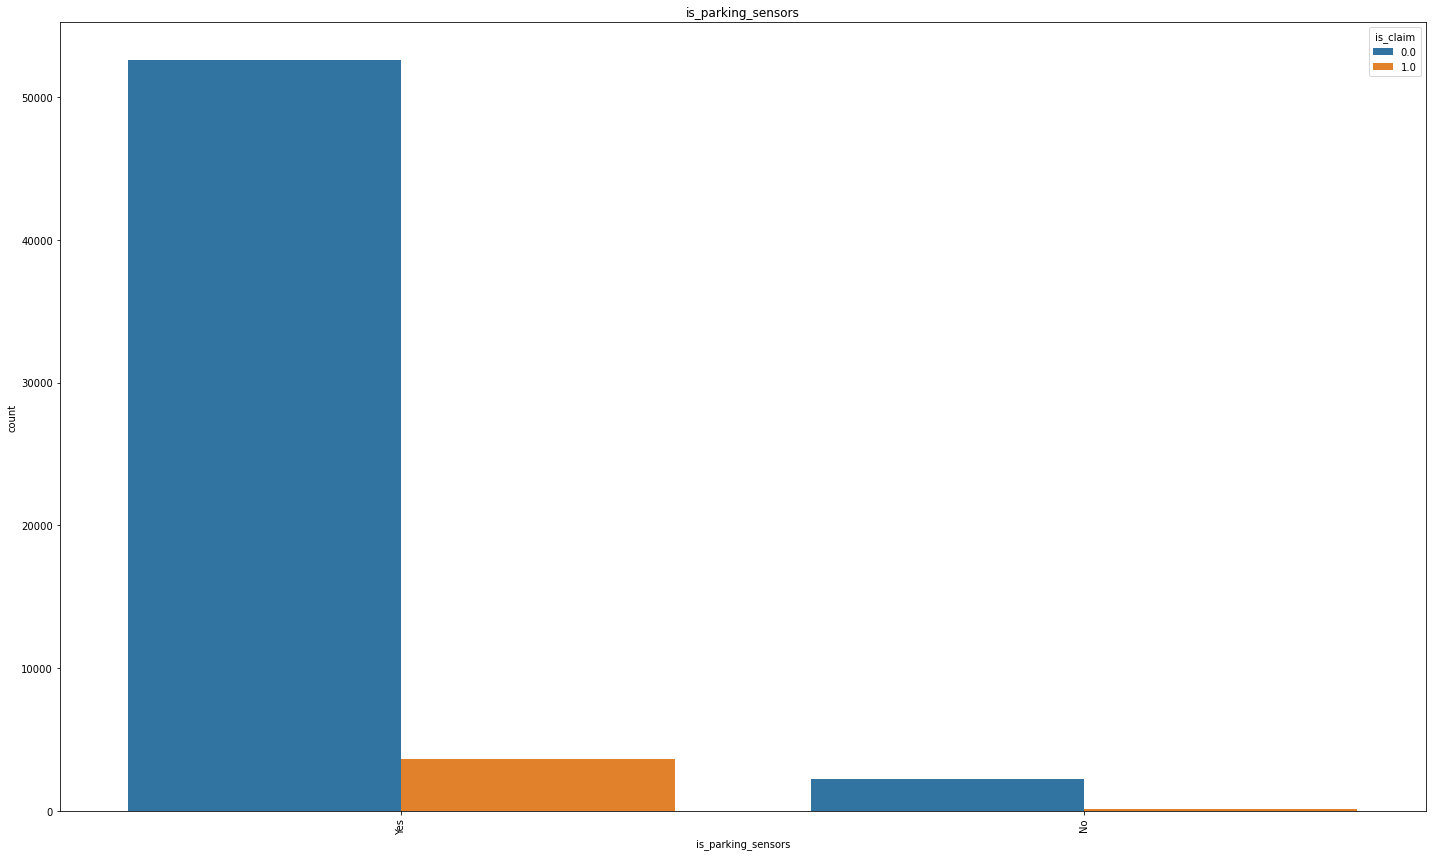

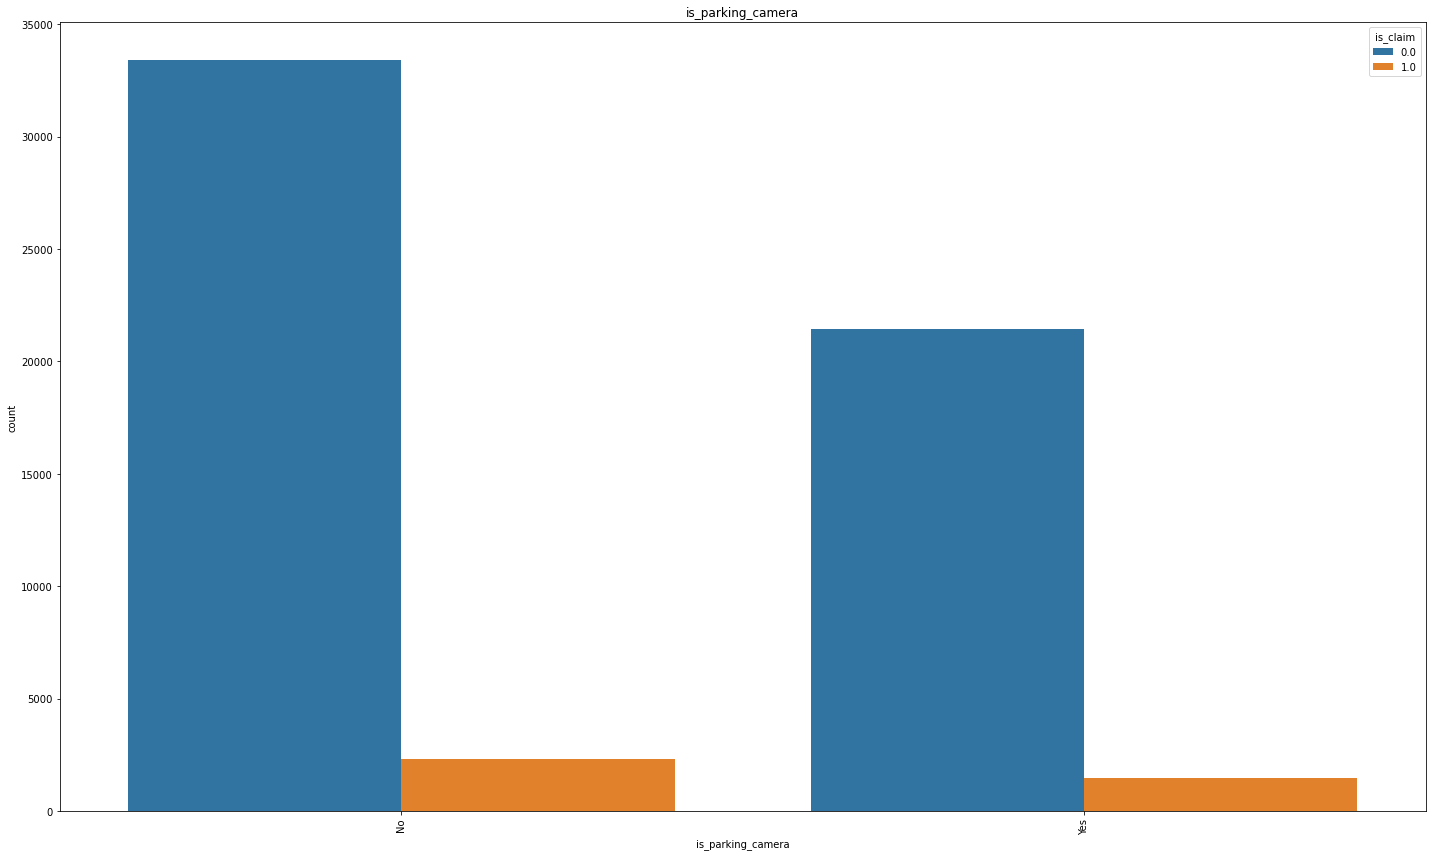

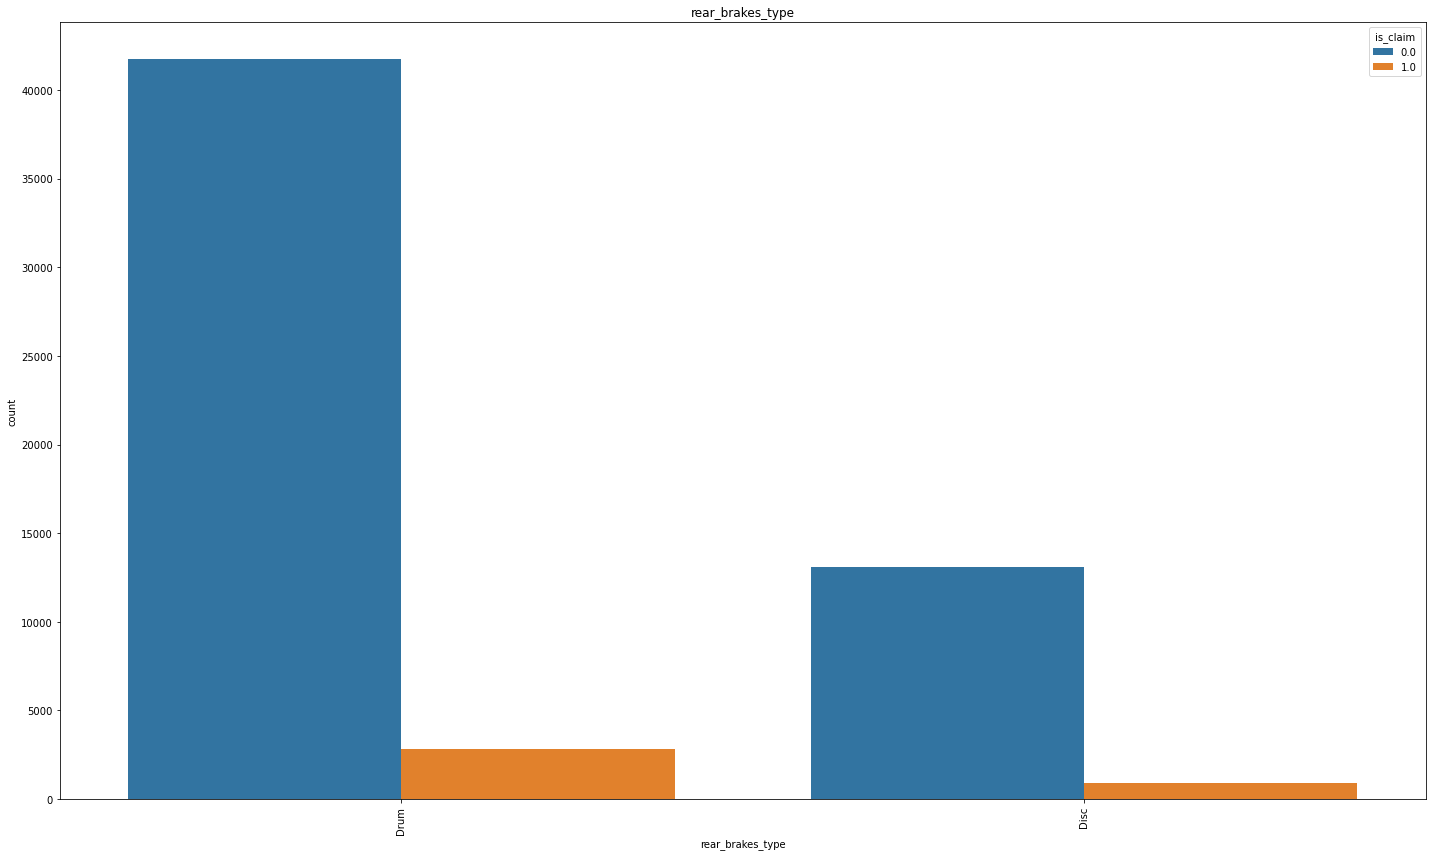

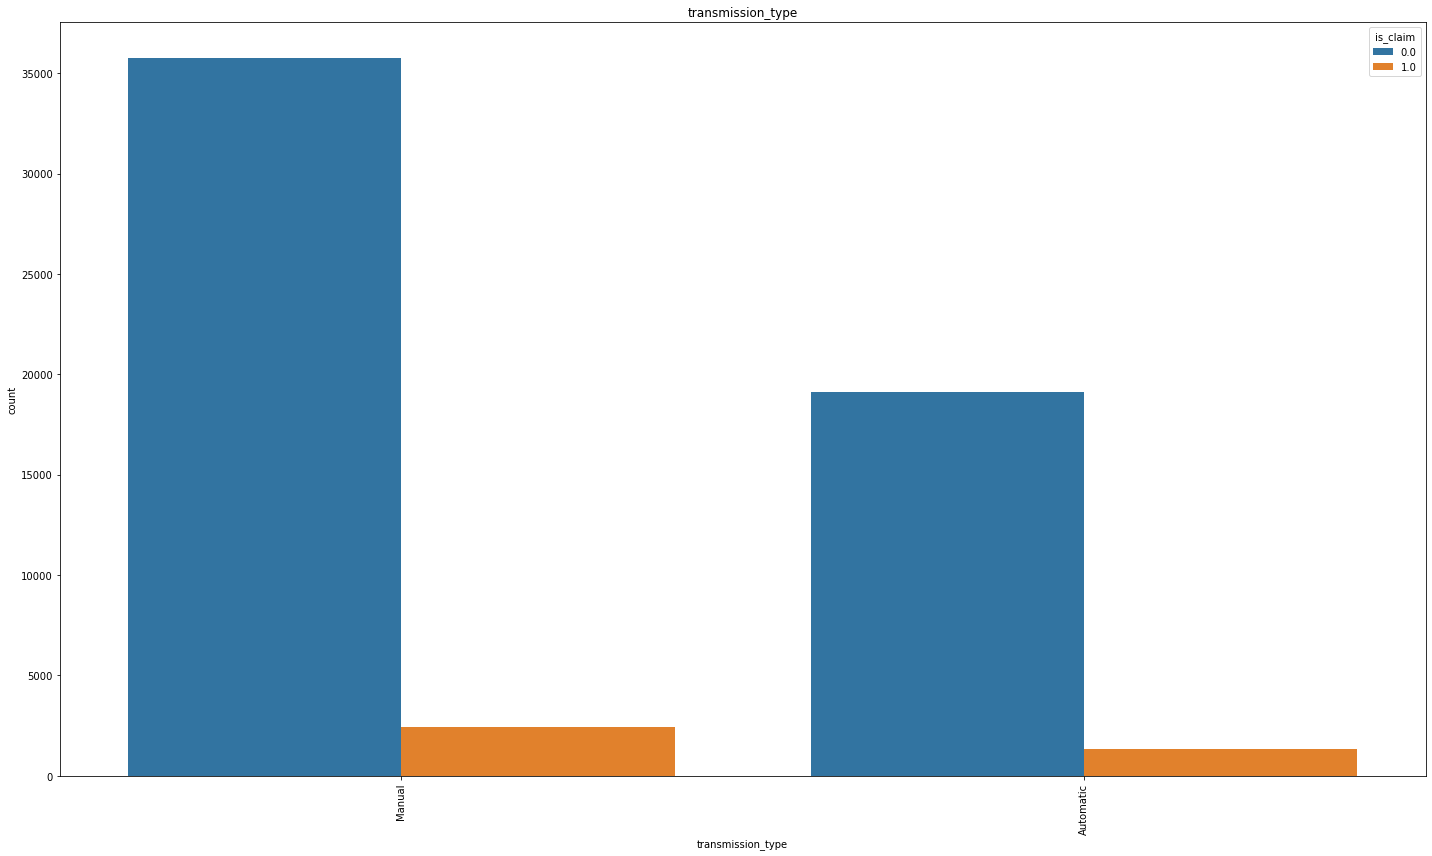

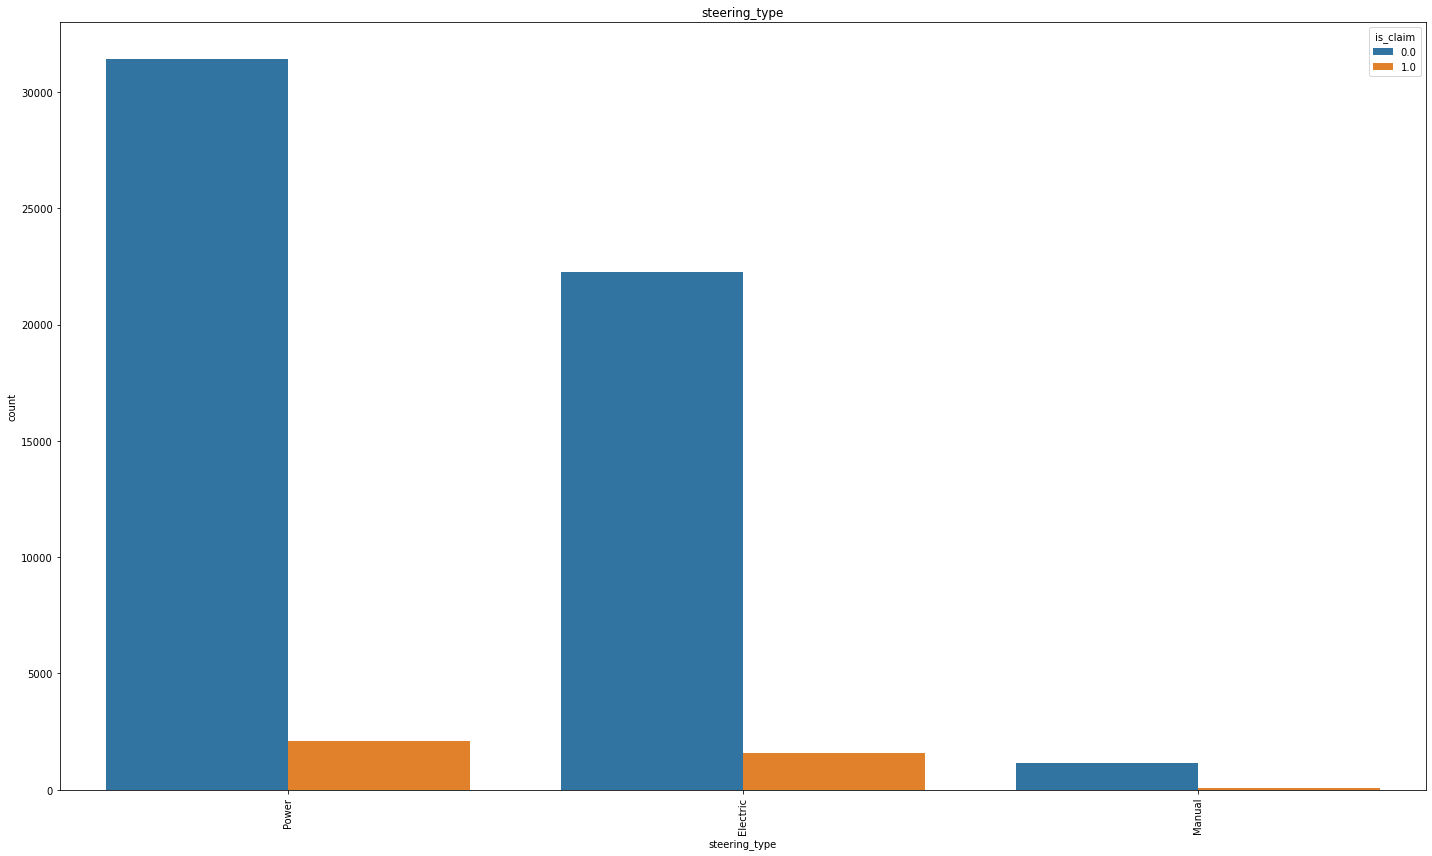

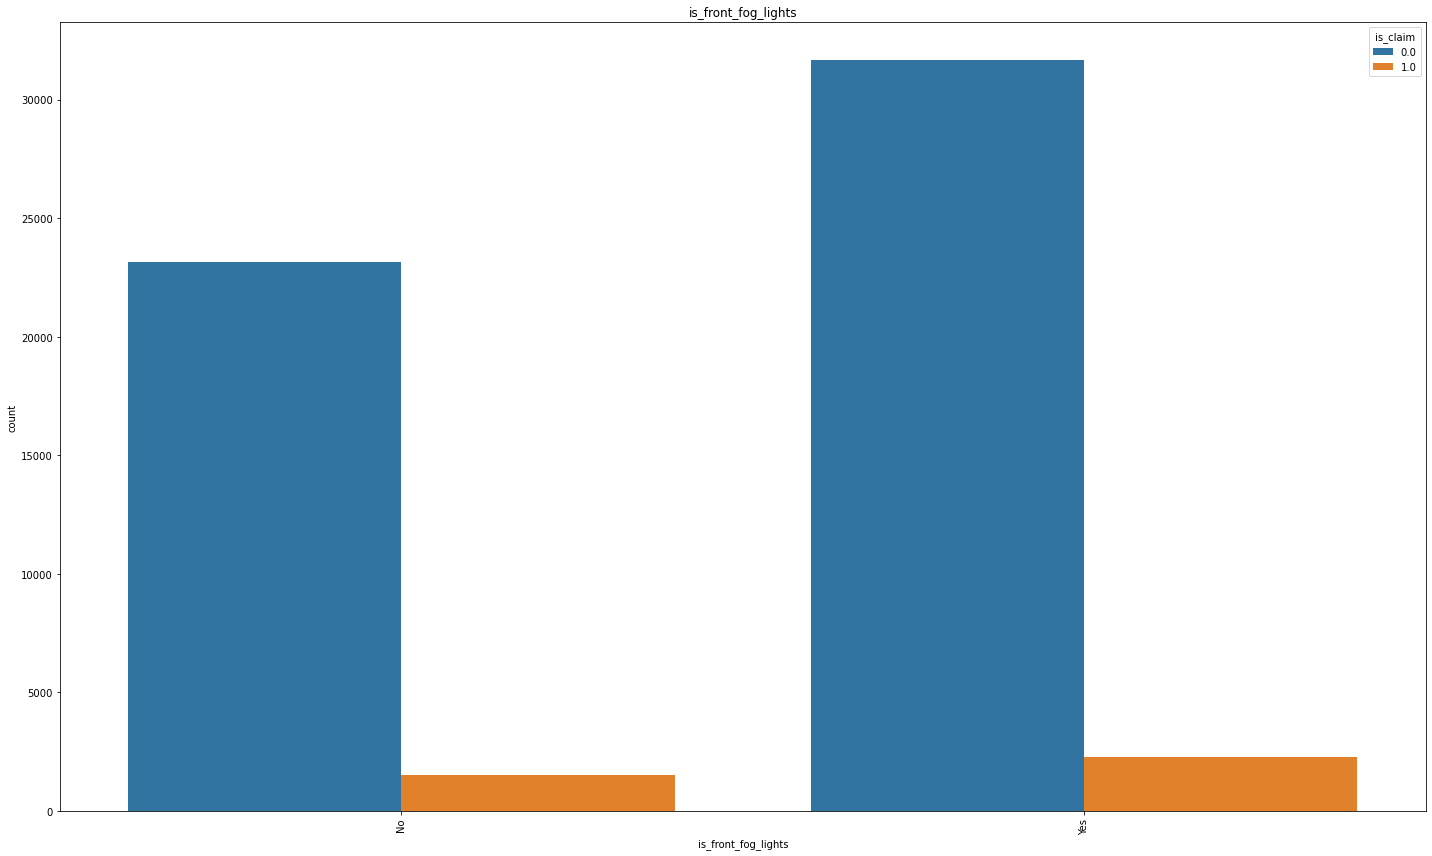

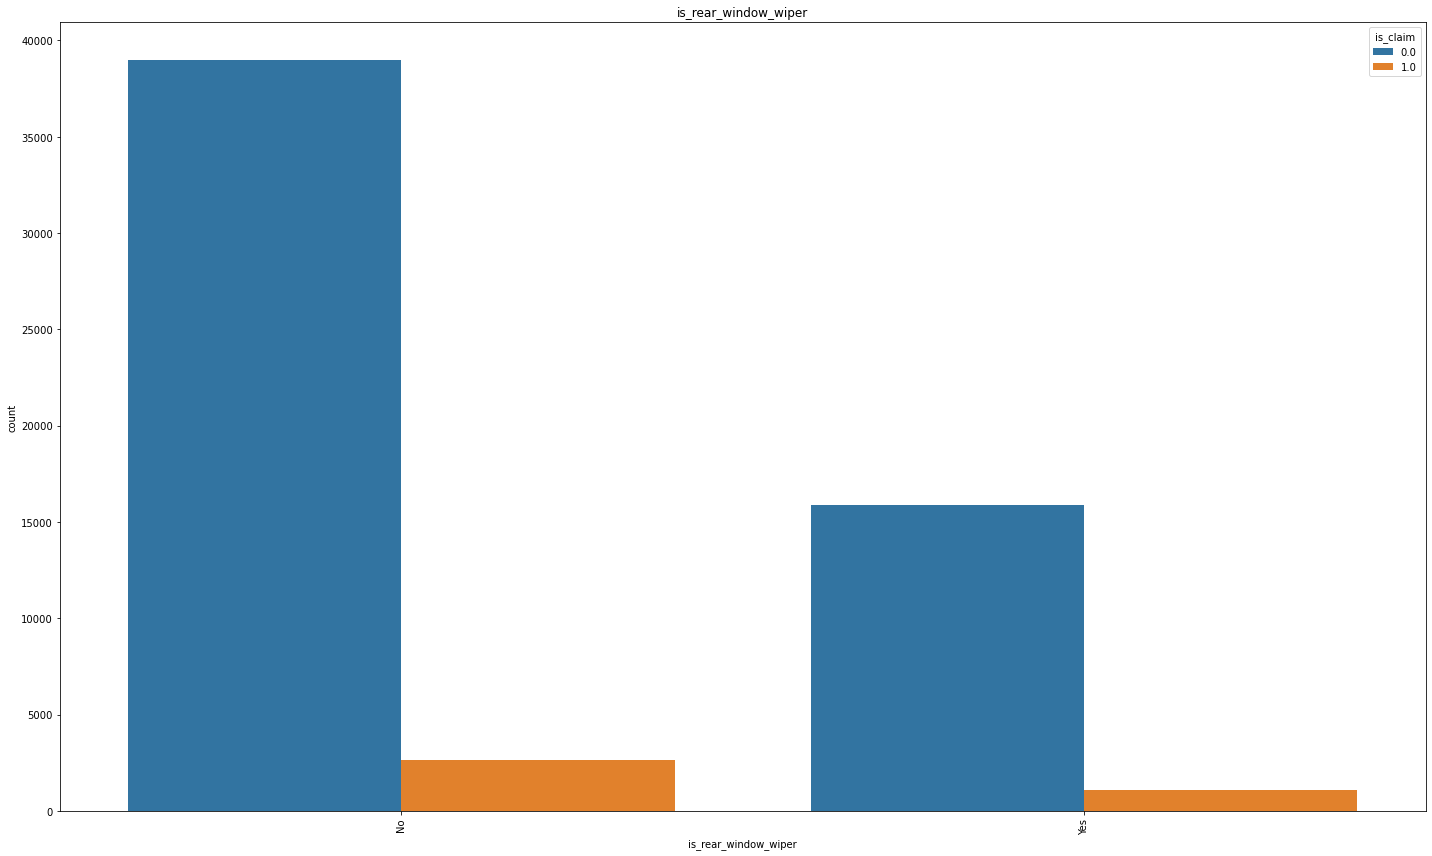

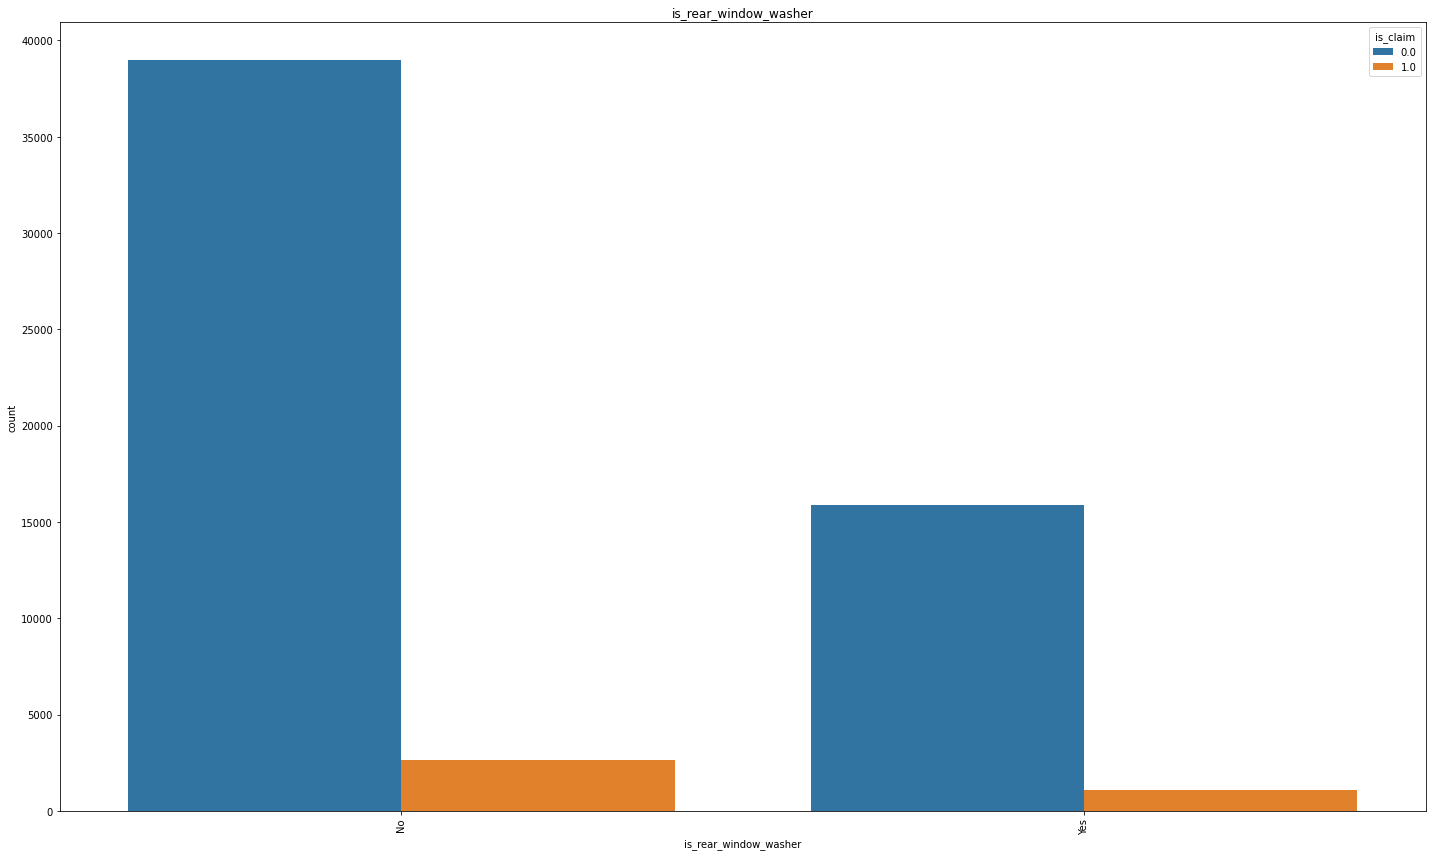

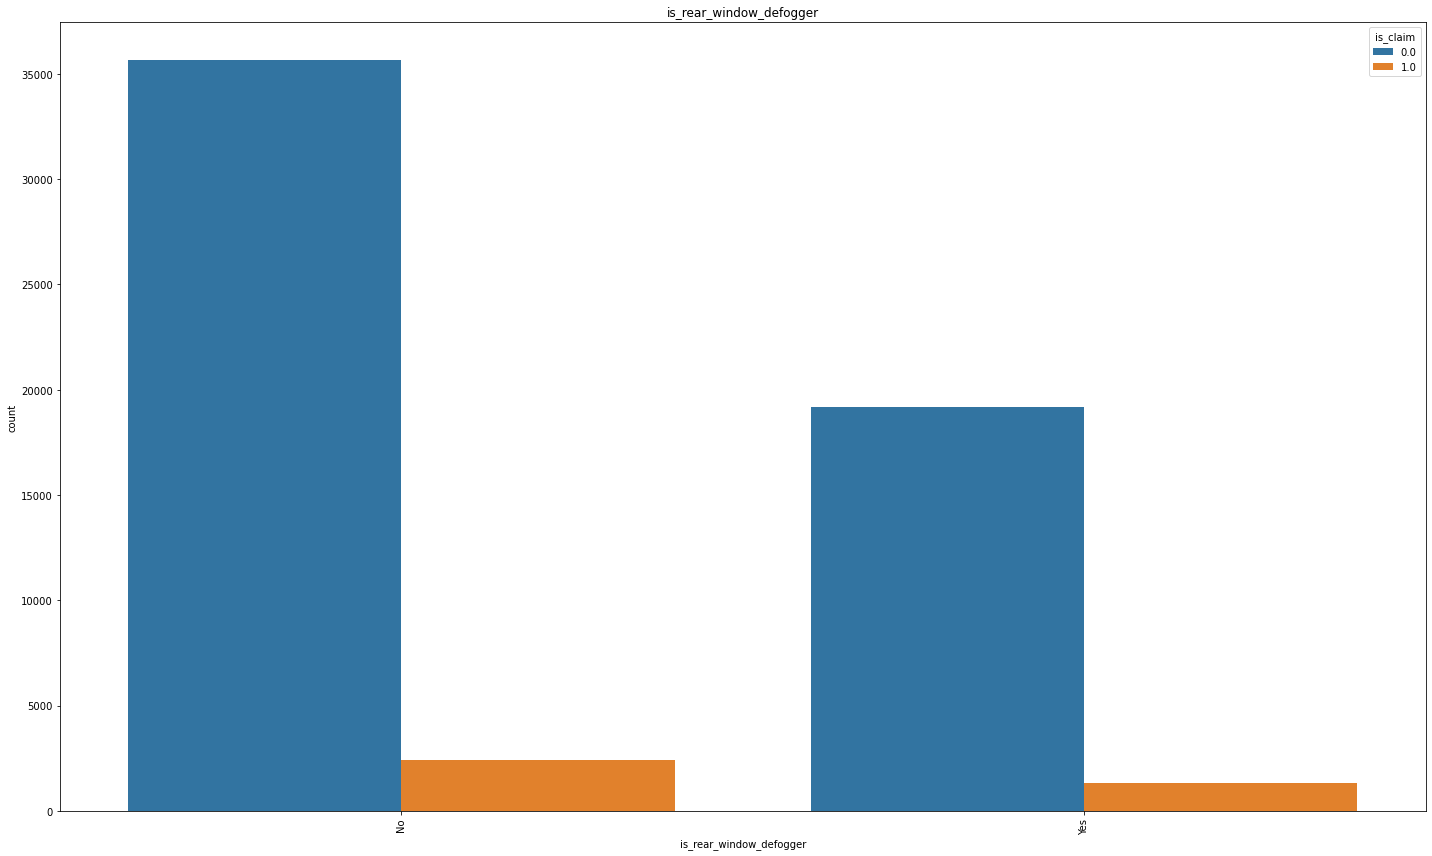

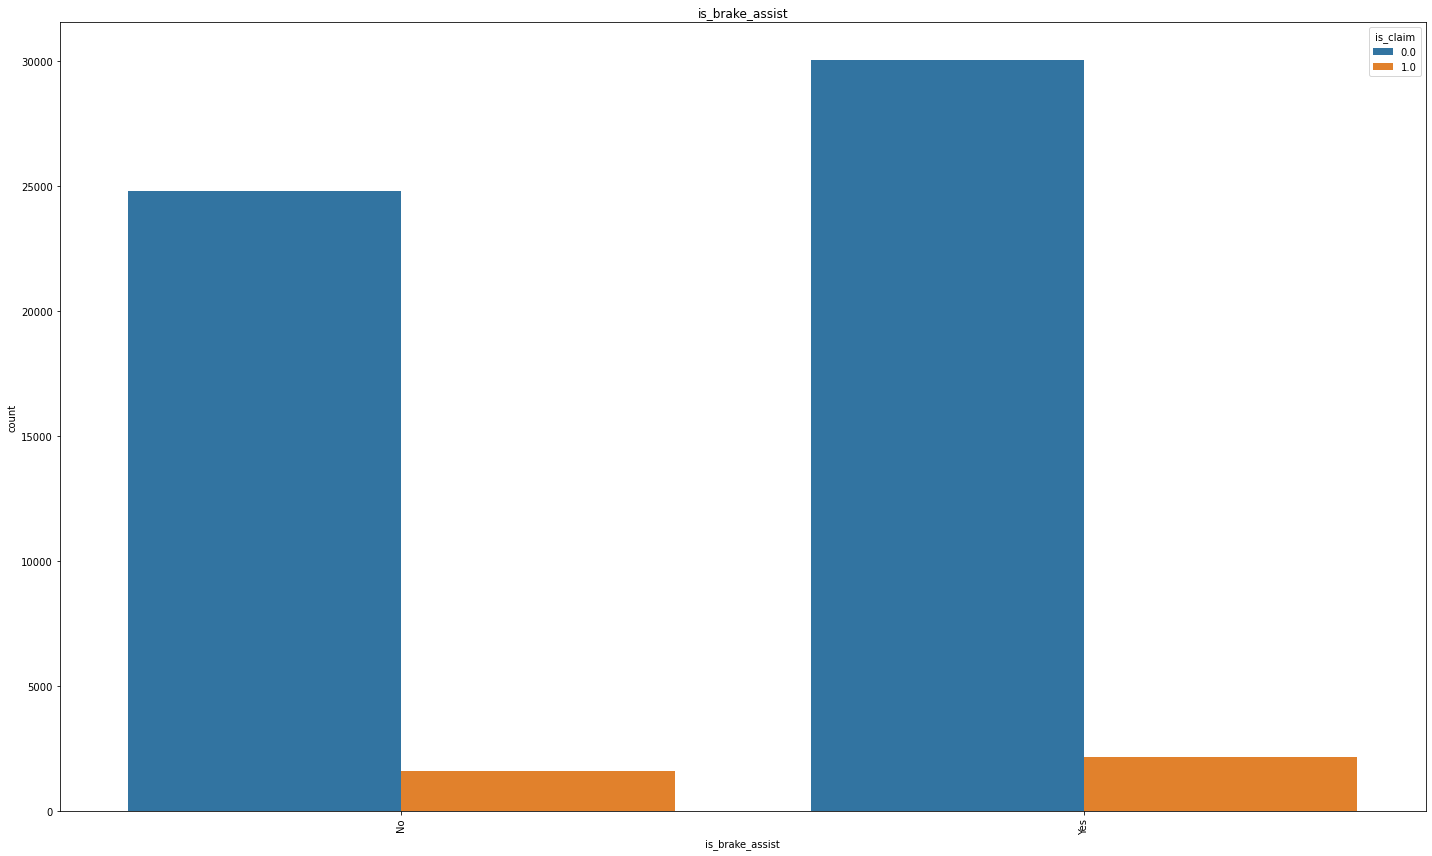

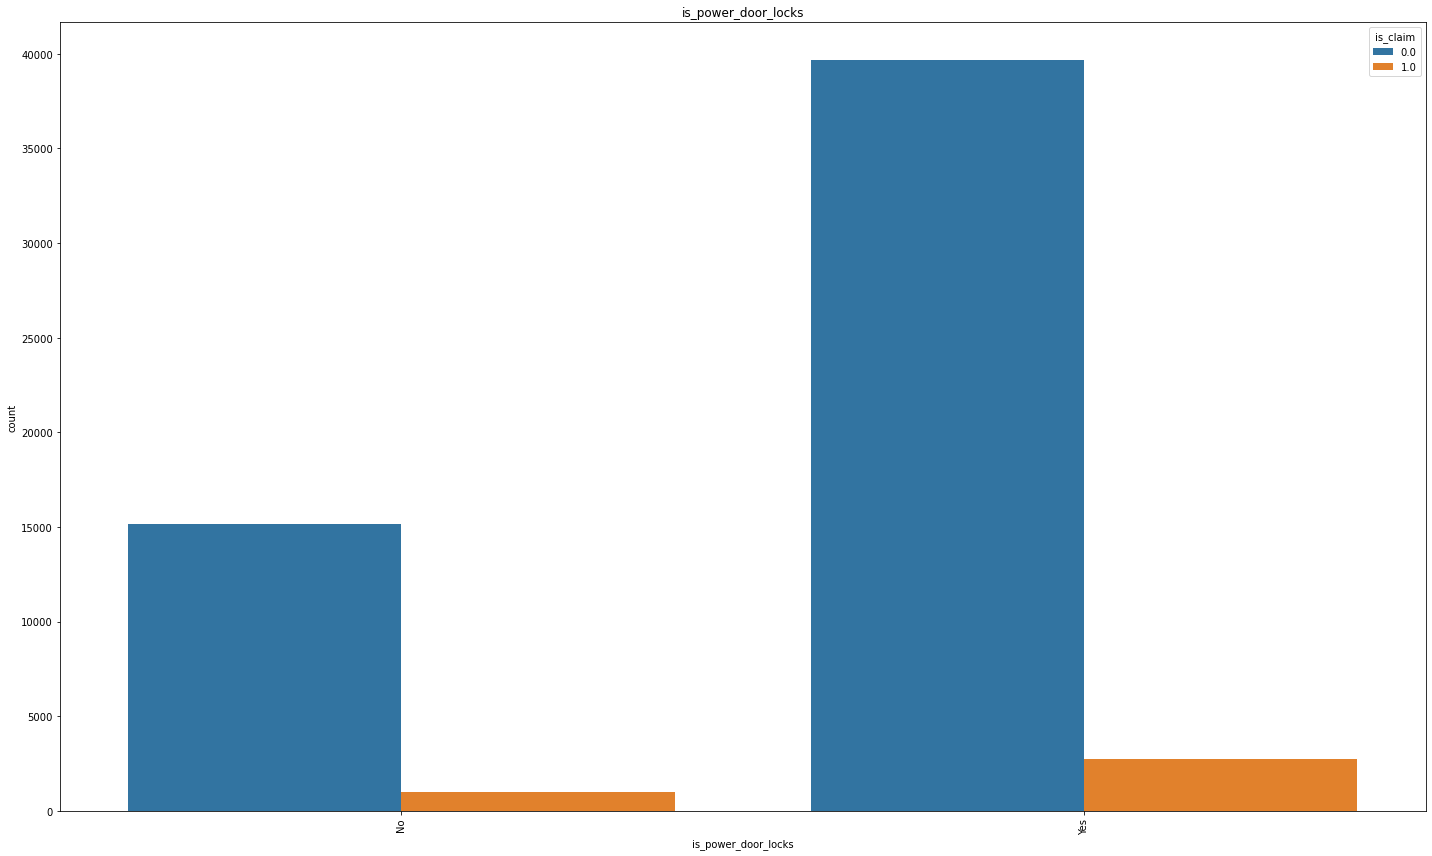

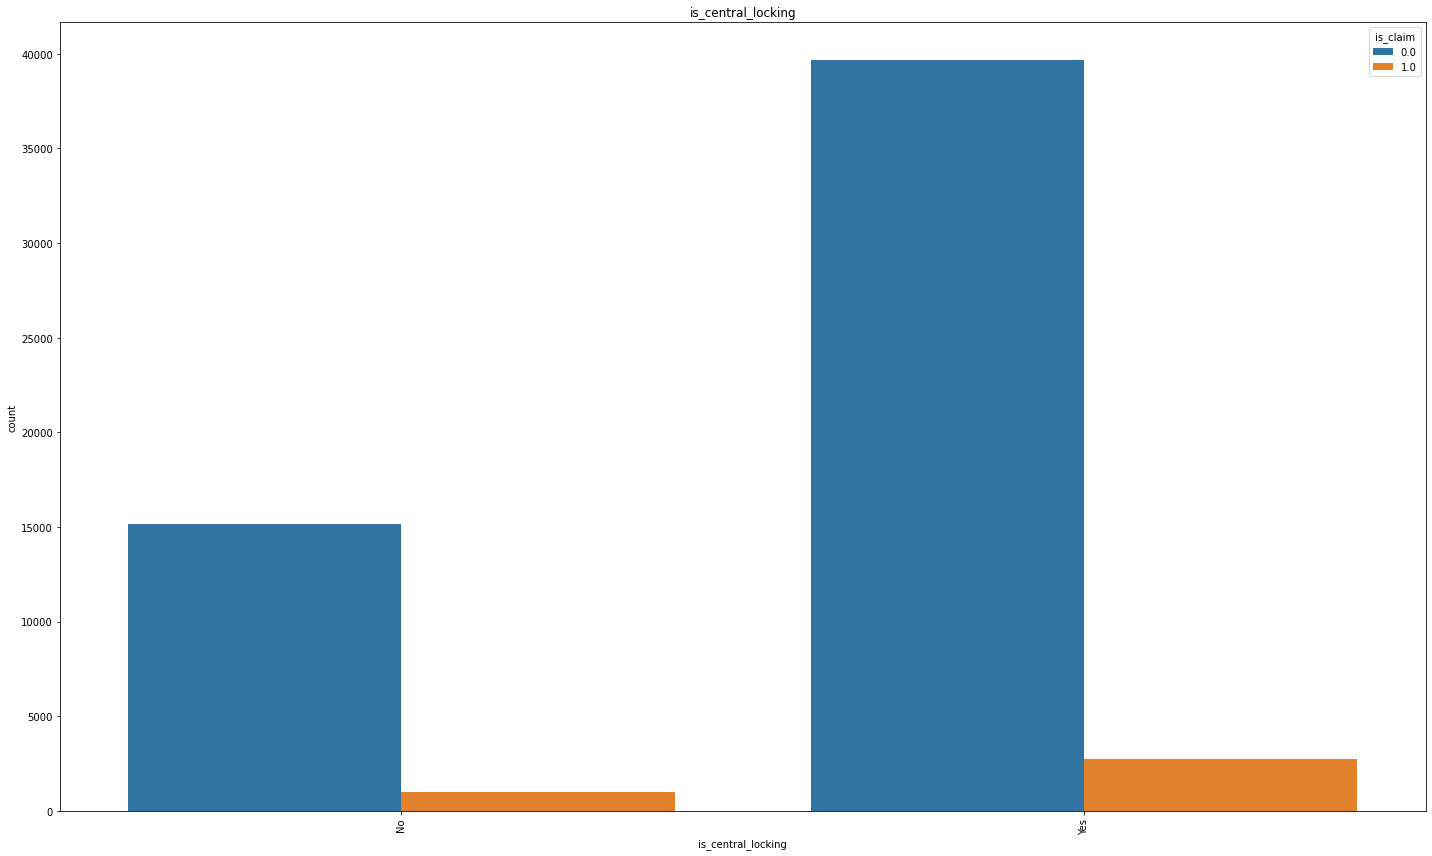

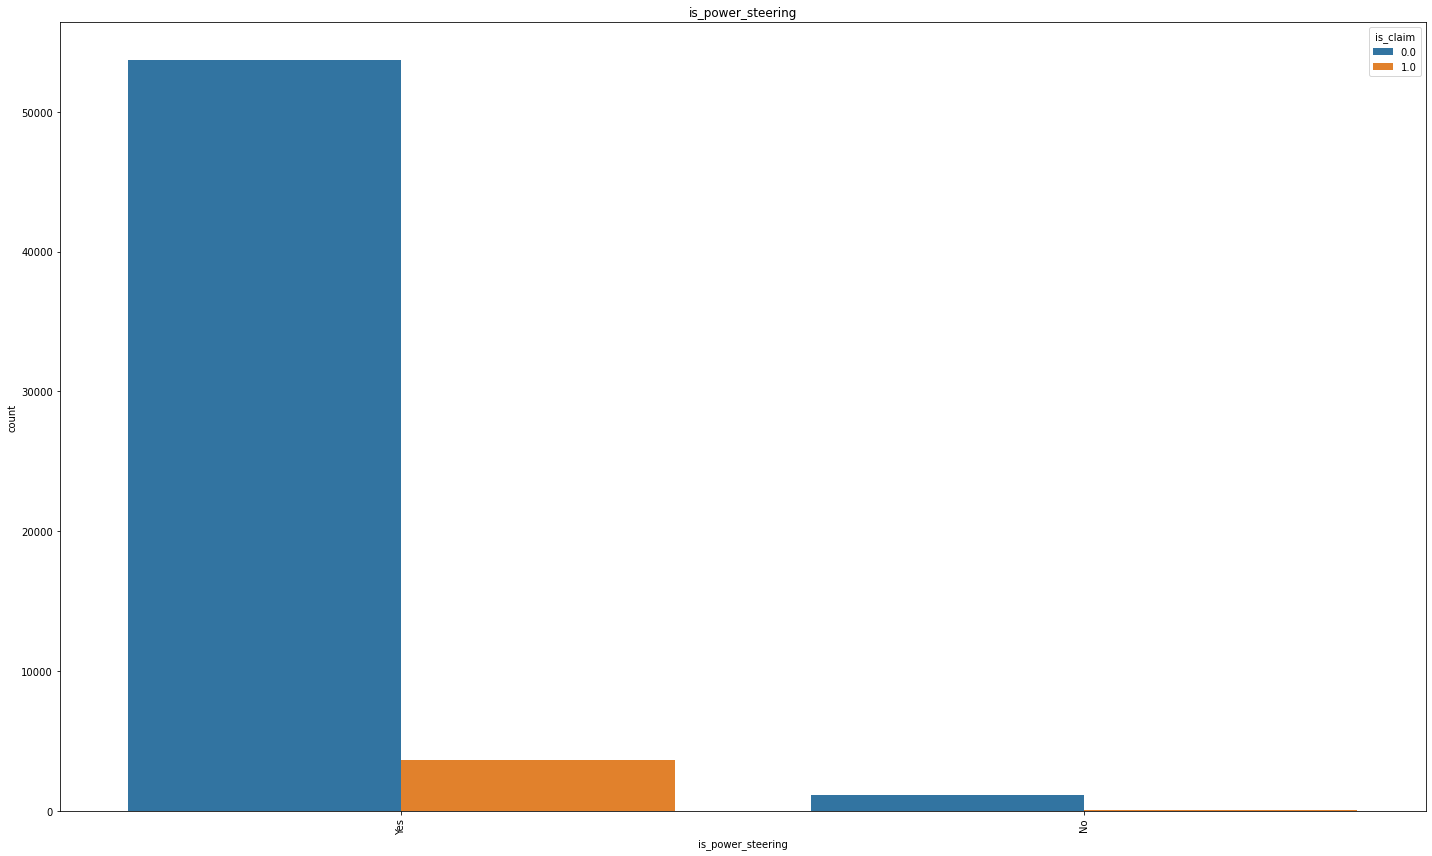

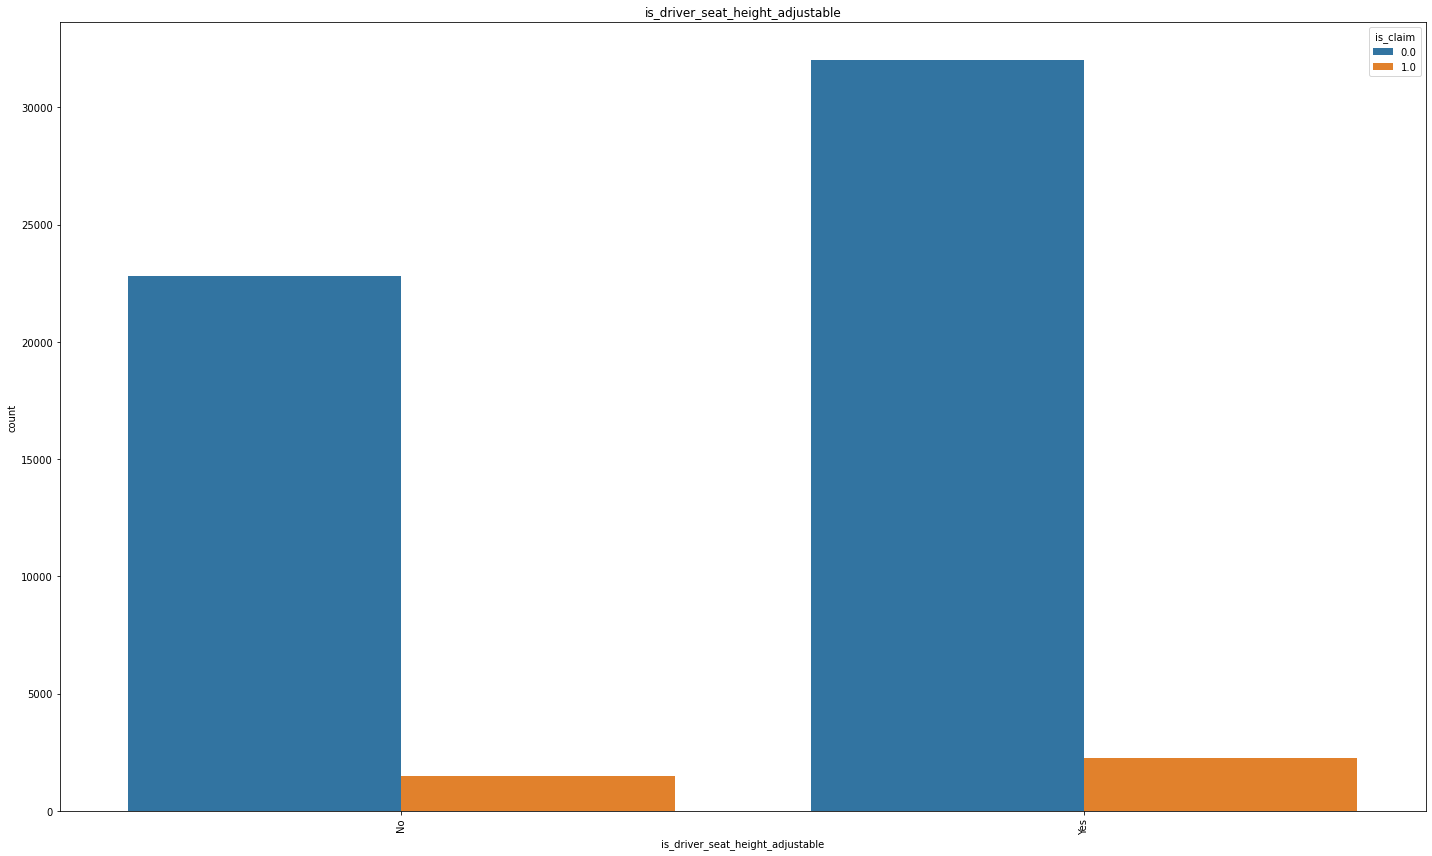

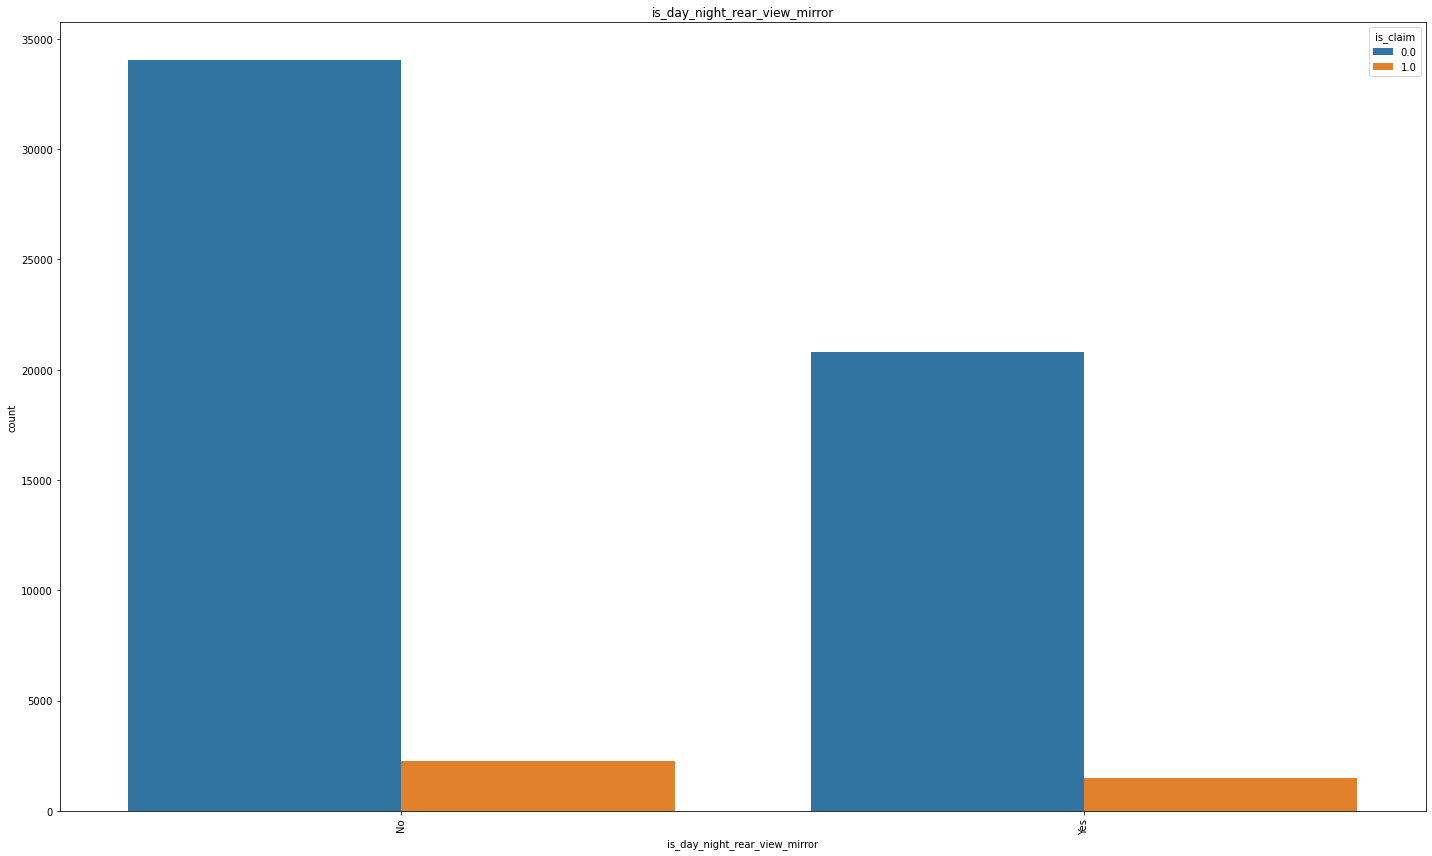

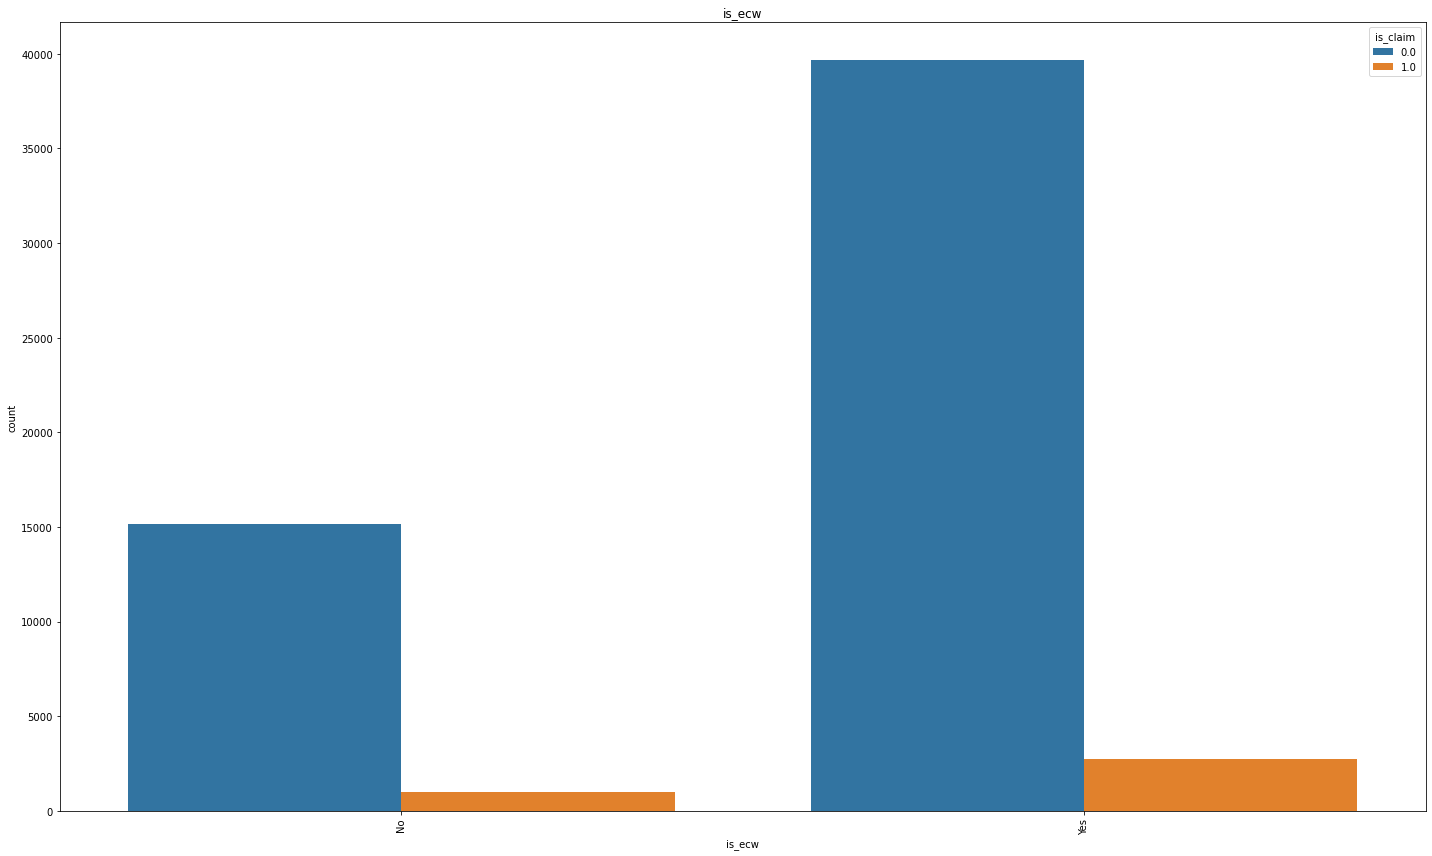

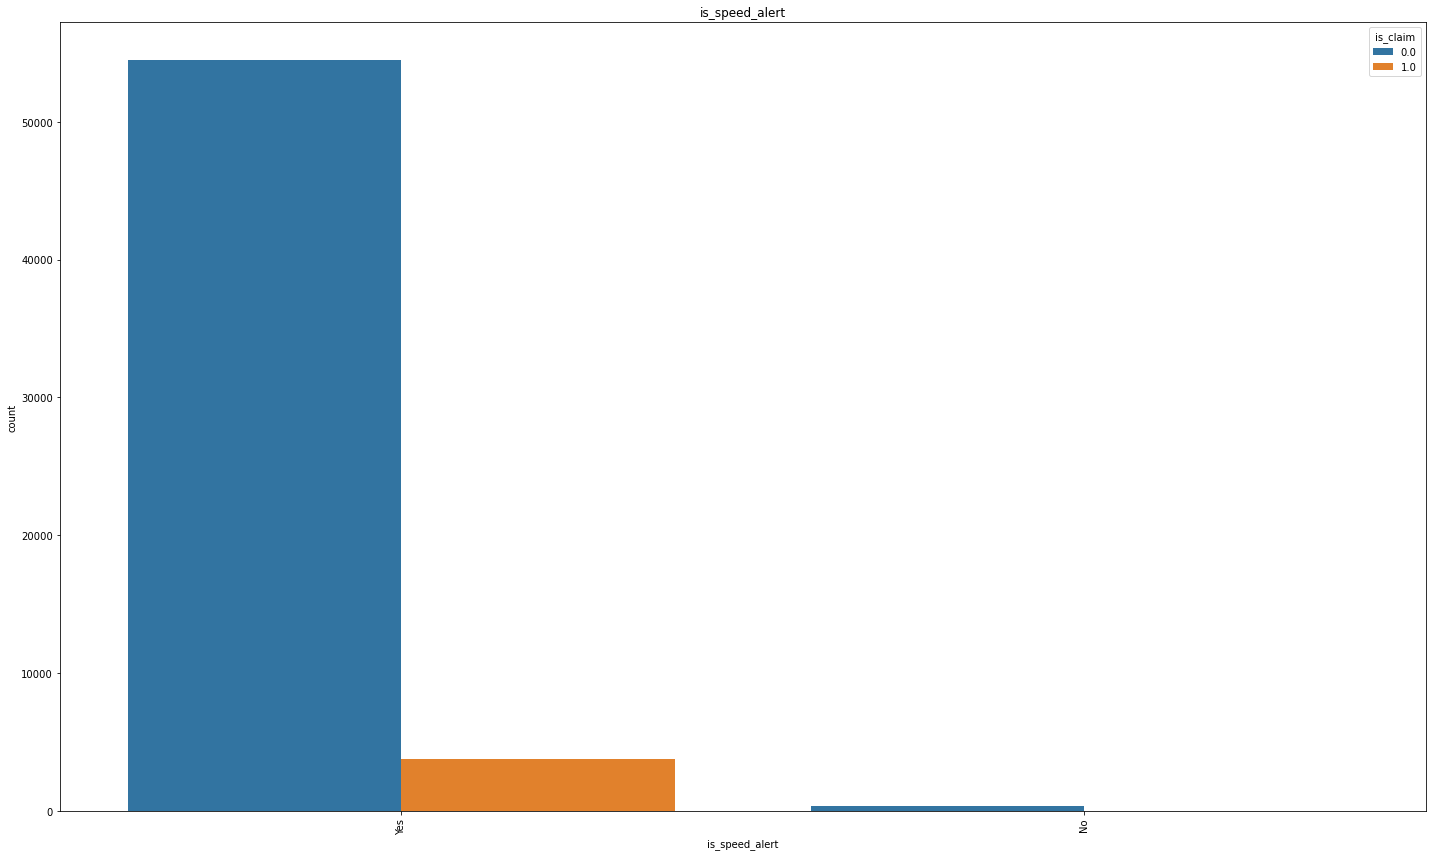

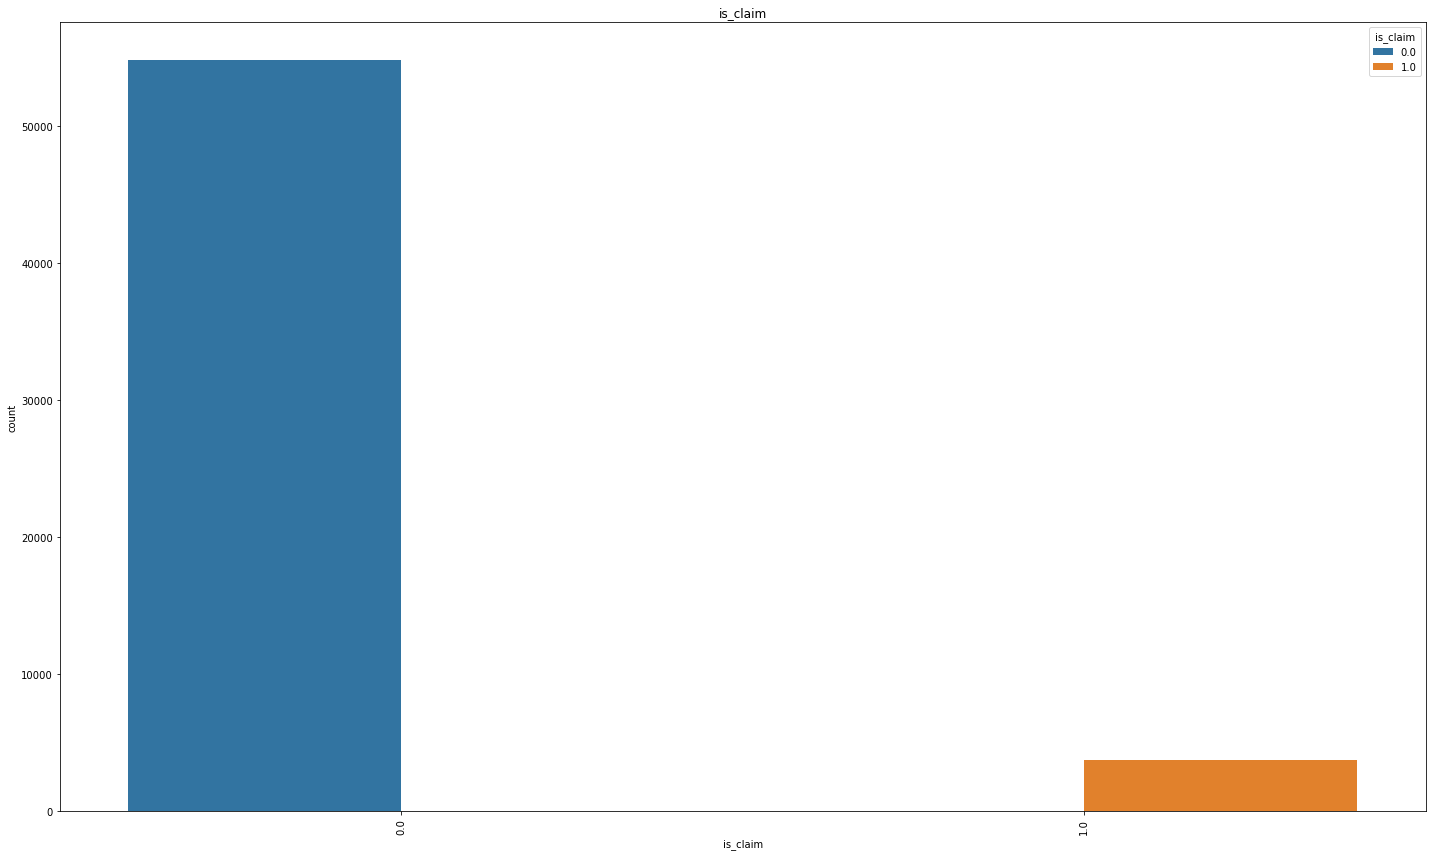

In [17]:
#Cat vs Cat

for i in cat:
    #plt.figure(figsize=(25,12))
    #plt.subplot(nrows, ncols, iterator)
    sns.countplot(combined[i],hue=combined["is_claim"])
    #iterator+=1
    plt.title(i)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

    

    
# CB is the area cluster from where most of the claims emerge
# K series dual jet engine, no parking camera, ]Model M6, B2 segment , drum brakes are some of the components
# bringing claims to the doors of the insurance company

In [18]:
# Missing values

combined.isnull().sum()

policy_id                               0
policy_tenure                           0
age_of_car                              0
age_of_policyholder                     0
area_cluster                            0
population_density                      0
make                                    0
segment                                 0
model                                   0
fuel_type                               0
max_torque                              0
max_power                               0
engine_type                             0
airbags                                 0
is_esc                                  0
is_adjustable_steering                  0
is_tpms                                 0
is_parking_sensors                      0
is_parking_camera                       0
rear_brakes_type                        0
displacement                            0
cylinder                                0
transmission_type                       0
gear_box                          

### Feature Engineering & Statistical Feature Selection



In [19]:
combined.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0.0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0.0


In [20]:
combined.columns

Index(['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'area_cluster', 'population_density', 'make', 'segment', 'model',
       'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags',
       'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim'],
      dtype='object')

# converting is columns to 0 and 1

### can do it this way

        combined[['is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera','is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert']]     =    
       
       
       pd.get_dummies(combined[['is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera','is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror','is_ecw', 'is_speed_alert']], drop_first=True)

In [21]:
combined.shape

(97655, 44)

In [22]:
### can also be done like


for col in combined:
    if col.startswith("is"):
        combined[col].replace({"Yes":1, "No":0}, inplace=True)
combined.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,1,1,0,1,1,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,1,0,0,1,1,1,1,1,1,1,1,1,2,0.0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,0,0,0,0,1,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,0,0,0,0,0,1,1,1,0,1,1,1,2,0.0


In [23]:
# Max torque and Max power

combined[["bhp", "rpm_power"]]=combined["max_power"].str.split("@", expand=True)
combined[["Nm", "rpm_torq"]]= combined["max_torque"].str.split("@", expand=True)
combined.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,bhp,rpm_power,Nm,rpm_torq
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,40.36bhp,6000rpm,60Nm,3500rpm
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,40.36bhp,6000rpm,60Nm,3500rpm
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,40.36bhp,6000rpm,60Nm,3500rpm
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,1,1,0,1,1,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,1,0,0,1,1,1,1,1,1,1,1,1,2,0.0,88.50bhp,6000rpm,113Nm,4400rpm
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,0,0,0,0,1,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,0,0,0,0,0,1,1,1,0,1,1,1,2,0.0,67.06bhp,5500rpm,91Nm,4250rpm


In [24]:
#remove bhp and rpm from the rows


combined["bhp"] = combined["bhp"].apply(lambda x: float(x[:-3]))
combined["rpm_power"] = combined["rpm_power"].apply(lambda x: float(x[:-3]))
combined["rpm_torq"] = combined["rpm_torq"].apply(lambda x: float(x[:-3]))
combined["Nm"] = combined["Nm"].apply(lambda x: float(x[:-2]))

In [26]:
combined.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,bhp,rpm_power,Nm,rpm_torq
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,40.36,6000.0,60.0,3500.0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,40.36,6000.0,60.0,3500.0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,40.36,6000.0,60.0,3500.0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,1,1,0,1,1,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,1,0,0,1,1,1,1,1,1,1,1,1,2,0.0,88.50,6000.0,113.0,4400.0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,0,0,0,0,1,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,0,0,0,0,0,1,1,1,0,1,1,1,2,0.0,67.06,5500.0,91.0,4250.0


In [27]:
# gross weight, height, width

combined[["gross_weight", "height", "width"]]

,gross_weight,height,width
0,1185,1475,1515
1,1185,1475,1515
2,1185,1475,1515
3,1335,1515,1735
4,1155,1490,1579
...,...,...,...
97650,1335,1530,1735
97651,1720,1635,1790
97652,1410,1500,1745
97653,1335,1515,1735


In [31]:
# weight per unit
# age= age of the car/ age of the policy holder
# per unit power= rpm/bhp
# per unit torque= rpm/ nm

for i in [combined]: #changes into an array so that we can pull out columns by i
    i["weight_per_unit"] = i["gross_weight"]/(i["height"]*i["width"]*i["length"])
    i["age"] = i["age_of_car"]/i["age_of_policyholder"]
    i["per_unit_power"] = i["rpm_power"]/ i["bhp"]
    i["per_unit_torque"] = i["rpm_torq"]/ i["Nm"]

In [32]:
combined.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,...,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,bhp,rpm_power,Nm,rpm_torq,weight_per_unit,age,per_unit_power,per_unit_torque
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,...,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,40.36,6000.0,60.0,3500.0,1.539304e-07,0.077612,148.662042,58.333333
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,...,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,40.36,6000.0,60.0,3500.0,1.539304e-07,0.053333,148.662042,58.333333
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,...,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,40.36,6000.0,60.0,3500.0,1.539304e-07,0.052000,148.662042,58.333333
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,1,1,0,1,1,Drum,1197,4,Automatic,5,Electric,...,1735,1515,1335,1,0,0,1,1,1,1,1,1,1,1,1,2,0.0,88.50,6000.0,113.0,4400.0,1.271313e-07,0.254222,67.796610,38.938053
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,0,0,0,0,1,Drum,999,3,Automatic,5,Electric,...,1579,1490,1155,0,0,0,0,0,1,1,1,0,1,1,1,2,0.0,67.06,5500.0,91.0,4250.0,1.315795e-07,0.173333,82.016105,46.703297


In [44]:
## dropping columns

combined.select_dtypes(include=np.number).columns

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'displacement', 'cylinder', 'gear_box',
       'turning_radius', 'length', 'width', 'height', 'gross_weight',
       'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'is_claim', 'bhp', 'rpm_power', 'Nm',
       'rpm_torq', 'weight_per_unit', 'age', 'per_unit_power',
       'per_unit_torque'],
      dtype='object')

In [41]:
num_cols = ['age_of_car', 'age_of_policyholder','population_density',
       'turning_radius', 'length', 'width', 'height', 'gross_weight', 'bhp', 'rpm_power', 'Nm',
       'rpm_torq', 'weight_per_unit', 'age', 'per_unit_power', 'policy_tenure',
       'per_unit_torque', 'displacement']
len(num_cols)

18

In [42]:
#T test

import scipy.stats as stats
signif_feats=[]


for i in num_cols:
    zero=combined.loc[combined["is_claim"]==0, i]
    one=combined.loc[combined["is_claim"]==1, i]
    
    teststats, pvalue = stats.ttest_ind(zero, one)
    
    if pvalue<0.05:
        signif_feats.append(i)
        
print(signif_feats)

['age_of_car', 'age_of_policyholder', 'population_density', 'width', 'age', 'policy_tenure']


In [45]:
#Chi 2 Contingency

cat_cols=['area_cluster', 'segment', 'model', 'fuel_type','engine_type', 'rear_brakes_type',
       'transmission_type', 'steering_type', 'ncap_rating','airbags', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'cylinder', 'gear_box',
       'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert']
len(cat_cols)

32

In [50]:
for i in cat_cols:
    tbl=pd.crosstab(combined.loc[:,i], combined["is_claim"])
    teststats,pvalue,df,exp_freq= stats.chi2_contingency(tbl)
    #print("Pvalue for", i, "is", np.round(pvalue,10))
    if pvalue<0.05:
        signif_feats.append(i)
        
print(signif_feats)

['age_of_car', 'age_of_policyholder', 'population_density', 'width', 'age', 'policy_tenure', 'area_cluster', 'segment', 'model', 'max_torque', 'max_power', 'engine_type', 'is_adjustable_steering', 'is_parking_sensors', 'cylinder', 'is_front_fog_lights', 'is_brake_assist', 'is_driver_seat_height_adjustable', 'is_claim', 'area_cluster', 'segment', 'model', 'max_torque', 'max_power', 'engine_type', 'is_adjustable_steering', 'is_parking_sensors', 'cylinder', 'is_front_fog_lights', 'is_brake_assist', 'is_driver_seat_height_adjustable', 'is_claim']


In [51]:
#!pip install category_encoders

In [52]:
#Categorical Target encoding


import category_encoders as ce

In [55]:
combined.select_dtypes(include="object").columns

Index(['policy_id', 'area_cluster', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'rear_brakes_type',
       'transmission_type', 'steering_type', 'ncap_rating'],
      dtype='object')

In [56]:
cat_cols=['area_cluster', 'segment', 'model', 'fuel_type', 'engine_type', 'rear_brakes_type',
       'transmission_type', 'steering_type', 'ncap_rating']

In [61]:
# split the data in train and test

newtrain= combined.loc[0:train.shape[0]-1,:]
newtest= combined.loc[train.shape[0]:, :]

newtrain.shape, newtest.shape

((58592, 52), (39063, 52))

In [62]:
#dropping columns and target from newtest


newtrain.drop(["policy_id", "max_power", "max_torque"], axis=1, inplace=True)
newtest= newtest.drop(["is_claim","policy_id", "max_power", "max_torque"], axis=1)

In [63]:
newtrain.shape, newtest.shape

((58592, 49), (39063, 48))

In [67]:
#Target encoding- category encoders

cat_cols=['area_cluster', 'segment', 'model', 'fuel_type', 'engine_type', 'rear_brakes_type',
       'transmission_type', 'steering_type', 'ncap_rating']

tgt_encoder = ce.TargetEncoder(cols=cat_cols)

X = newtrain.drop("is_claim", axis=1)
y= newtrain["is_claim"]

In [68]:
newX= tgt_encoder.fit_transform(X, y)
newtest = tgt_encoder.transform(newtest)

In [73]:
newX.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,bhp,rpm_power,Nm,rpm_torq,weight_per_unit,age,per_unit_power,per_unit_torque
0,0.515874,0.05,0.644231,0.051771,4990,1,0.060389,0.061413,0.060748,0.061413,2,0,0,0,1,0,0.063871,796,3,0.063854,5,0.062026,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0.062418,40.36,6000.0,60.0,3500.0,1.539304e-07,0.077612,148.662042,58.333333
1,0.672619,0.02,0.375000,0.070825,27003,1,0.060389,0.061413,0.060748,0.061413,2,0,0,0,1,0,0.063871,796,3,0.063854,5,0.062026,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0.062418,40.36,6000.0,60.0,3500.0,1.539304e-07,0.053333,148.662042,58.333333
2,0.841110,0.02,0.384615,0.070972,4076,1,0.060389,0.061413,0.060748,0.061413,2,0,0,0,1,0,0.063871,796,3,0.063854,5,0.062026,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0.062418,40.36,6000.0,60.0,3500.0,1.539304e-07,0.052000,148.662042,58.333333
3,0.900277,0.11,0.432692,0.076692,21622,1,0.064099,0.074074,0.066384,0.074074,2,1,1,0,1,1,0.063871,1197,4,0.064181,5,0.066873,4.8,3995,1735,1515,1335,1,0,0,1,1,1,1,1,1,1,1,1,0.064994,88.50,6000.0,113.0,4400.0,1.271313e-07,0.254222,67.796610,38.938053
4,0.596403,0.11,0.634615,0.057745,34738,2,0.060389,0.053940,0.066384,0.053940,2,0,0,0,0,1,0.063871,999,3,0.064181,5,0.066873,5.0,3731,1579,1490,1155,0,0,0,0,0,1,1,1,0,1,1,1,0.064994,67.06,5500.0,91.0,4250.0,1.315795e-07,0.173333,82.016105,46.703297


In [80]:
#standard scaler for numbers


from sklearn.preprocessing import StandardScaler

ss= StandardScaler()

newX.select_dtypes(include=np.number).columns

num_cols=['policy_tenure','population_density',
       'displacement', 'turning_radius', 'length', 'width', 'height',
       'gross_weight', 'bhp', 'rpm_power', 'Nm',
       'rpm_torq', 'weight_per_unit','per_unit_power',
       'per_unit_torque']

for i in num_cols:
    newX.loc[:, i]= ss.fit_transform(pd.DataFrame(newX.loc[:,i]))
    newtest.loc[:, i]= ss.fit_transform(pd.DataFrame(newtest.loc[:,i]))

In [89]:
#Model Building

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [90]:
#list of models

def base_models():
    models = dict()
    models['lg'] = LogisticRegression()
    models['dtree'] = DecisionTreeClassifier()
    models["rf"] = RandomForestClassifier()
    models["etree"] = ExtraTreesClassifier()
    models["adaboost"] = AdaBoostClassifier()
    models["gbm"] = GradientBoostingClassifier()
    models["xgb"] = XGBClassifier()
    models["lgbm"] = LGBMClassifier()
    return models

In [93]:
base_models()

{'lg': LogisticRegression(),
 'dtree': DecisionTreeClassifier(),
 'rf': RandomForestClassifier(),
 'etree': ExtraTreesClassifier(),
 'adaboost': AdaBoostClassifier(),
 'gbm': GradientBoostingClassifier(),
 'xgb': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, ...),
 'lgbm': LGBMClassifier(

In [103]:
#Evaluate the model

from sklearn.model_selection import StratifiedKFold, cross_val_score

def eval_models(model):
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=121)
    
    scores = cross_val_score(estimator=model, X=newX, y=y, scoring= "f1", cv=cv, error_score="raise", n_jobs=-1)
    
    return scores

In [ ]:
models = base_models()
for name, model in models.items():
    print(model)

In [111]:
#Build the models
models = base_models()

#list for result and model names
result, names = list(), list()

for name, model in models.items():
    
    scores = eval_models(model)
    
    result.append(scores) # this will save th f1 score
    names.append(name) #this will save the name of the model
    print(">%s : Mean result: %.3f ,Standard Dev: %.3f" % (name,np.mean(result), np.std(result)))
    

>lg : Mean result: 0.000 ,Standard Dev: 0.000
>dtree : Mean result: 0.043 ,Standard Dev: 0.044
>rf : Mean result: 0.034 ,Standard Dev: 0.038
>etree : Mean result: 0.034 ,Standard Dev: 0.033
>adaboost : Mean result: 0.027 ,Standard Dev: 0.033
>gbm : Mean result: 0.022 ,Standard Dev: 0.032
>xgb : Mean result: 0.019 ,Standard Dev: 0.030
>lgbm : Mean result: 0.017 ,Standard Dev: 0.029


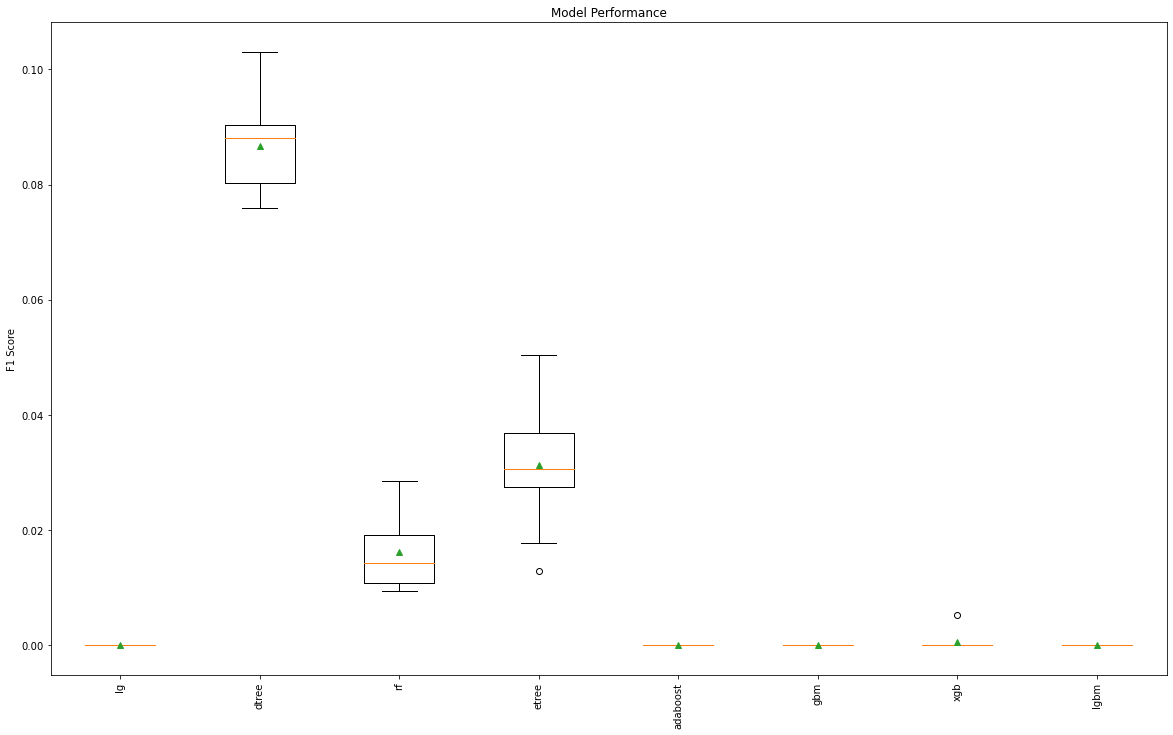

In [112]:
# Plotting the output

plt.boxplot(result, labels= names, showmeans= True)
plt.xticks(rotation=90)
plt.ylabel("F1 Score")
plt.title("Model Performance")
plt.show()

## SMOTE for handling imbalance

In [115]:
from imblearn.over_sampling import SMOTE

smote= SMOTE(sampling_strategy= "minority")

smotex, smotey = smote.fit_resample(newX , y)

In [116]:
def base_models():
    models = dict()
    models['lg'] = LogisticRegression()
    models['dtree'] = DecisionTreeClassifier()
    models["rf"] = RandomForestClassifier()
    models["etree"] = ExtraTreesClassifier()
    models["adaboost"] = AdaBoostClassifier()
    models["gbm"] = GradientBoostingClassifier()
    models["xgb"] = XGBClassifier()
    models["lgbm"] = LGBMClassifier()
    return models

In [117]:
def eval_models(model):
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=121)
    
    scores = cross_val_score(estimator=model, X=smotex, y=smotey, scoring= "f1", cv=cv, error_score="raise", n_jobs=-1)
    
    return scores

In [118]:
models = base_models()

#list for result and model names
result, names = list(), list()

for name, model in models.items():
    
    scores = eval_models(model)
    
    result.append(scores) # this will save th f1 score
    names.append(name) #this will save the name of the model
    print(">%s : Mean result: %.3f ,Standard Dev: %.3f" % (name,np.mean(result), np.std(result)))

>lg : Mean result: 0.588 ,Standard Dev: 0.007
>dtree : Mean result: 0.752 ,Standard Dev: 0.164
>rf : Mean result: 0.813 ,Standard Dev: 0.159
>etree : Mean result: 0.843 ,Standard Dev: 0.148
>adaboost : Mean result: 0.820 ,Standard Dev: 0.140
>gbm : Mean result: 0.828 ,Standard Dev: 0.129
>xgb : Mean result: 0.847 ,Standard Dev: 0.128
>lgbm : Mean result: 0.860 ,Standard Dev: 0.125


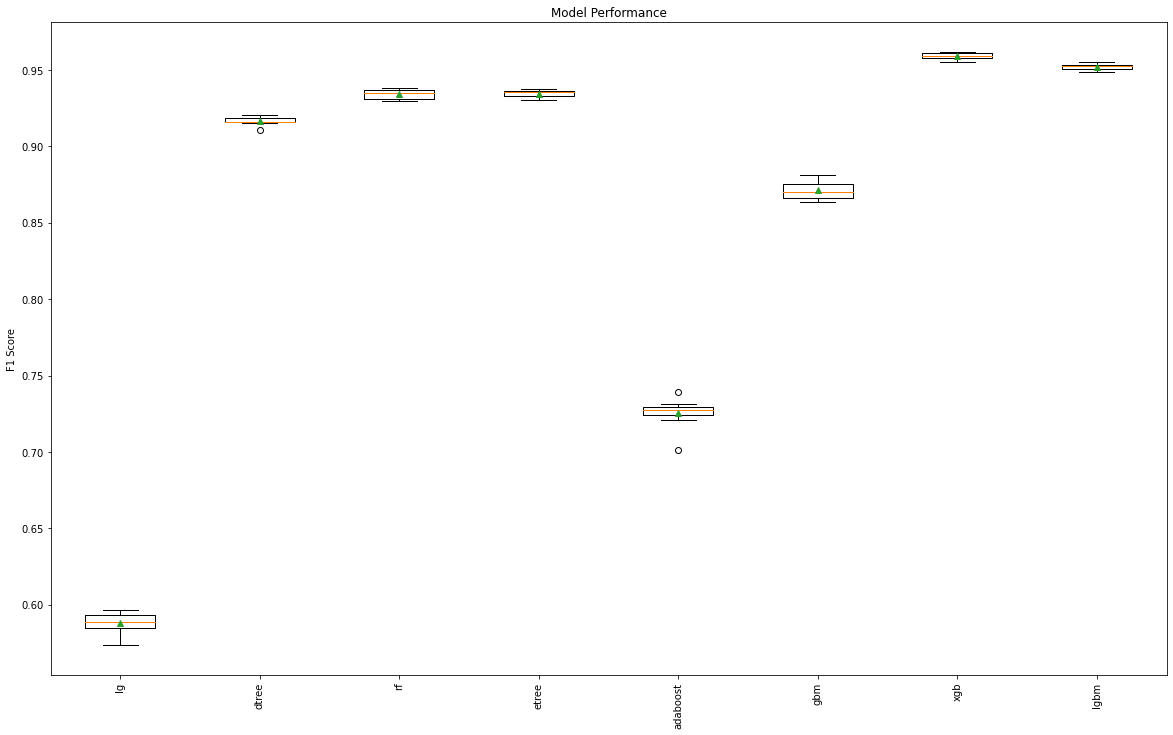

In [119]:
# Plotting the output

plt.boxplot(result, labels= names, showmeans= True)
plt.xticks(rotation=90)
plt.ylabel("F1 Score")
plt.title("Model Performance")
plt.show()

In [120]:
#Random forest, Etree,xgb, lgbm, gbm, 

#Final random forest model

rf= RandomForestClassifier()

pred_rf=[]

kf= StratifiedKFold(n_splits=10 , shuffle = True , random_state=121)

for train_index, test_index in kf.split(smotex, smotey):
    xtrain = smotex.iloc[train_index]
    xtest = smotex.iloc[test_index]
    ytrain = smotey.iloc[train_index]
    ytest = smotey.iloc[test_index]
    pred_rf.append(rf.fit(xtrain,ytrain).predict(newtest))

In [121]:
#submission 
finalpred= pd.DataFrame(pred_rf).T.mode(axis=1)[0]
sub= pd.DataFrame({"policy_id":test.policy_id, "is_claim":finalpred})

sub.to_csv("RandomForestModel - F1.csv", index=False) #0.10520806071708977

In [122]:
xgb= XGBClassifier()

pred_xgb=[]

kf= StratifiedKFold(n_splits=10 , shuffle = True , random_state=121)

for train_index, test_index in kf.split(smotex, smotey):
    xtrain = smotex.iloc[train_index]
    xtest = smotex.iloc[test_index]
    ytrain = smotey.iloc[train_index]
    ytest = smotey.iloc[test_index]
    pred_xgb.append(xgb.fit(xtrain,ytrain).predict(newtest))

In [123]:
#submission 
finalpred= pd.DataFrame(pred_xgb).T.mode(axis=1)[0]
sub= pd.DataFrame({"policy_id":test.policy_id, "is_claim":finalpred})

sub.to_csv("XGBModel - F1.csv", index=False) #0.11166945840312674

In [124]:
etree= ExtraTreesClassifier()

pred_etree=[]

kf= StratifiedKFold(n_splits=10 , shuffle = True , random_state=121)

for train_index, test_index in kf.split(smotex, smotey):
    xtrain = smotex.iloc[train_index]
    xtest = smotex.iloc[test_index]
    ytrain = smotey.iloc[train_index]
    ytest = smotey.iloc[test_index]
    pred_etree.append(etree.fit(xtrain,ytrain).predict(newtest))

In [125]:
#submission 
finalpred= pd.DataFrame(pred_etree).T.mode(axis=1)[0]
sub= pd.DataFrame({"policy_id":test.policy_id, "is_claim":finalpred})

sub.to_csv("ETreeModel - F1.csv", index=False) #0.10329734461628244,

In [126]:
lgbm= LGBMClassifier()

pred_lgbm=[]

kf= StratifiedKFold(n_splits=10 , shuffle = True , random_state=121)

for train_index, test_index in kf.split(smotex, smotey):
    xtrain = smotex.iloc[train_index]
    xtest = smotex.iloc[test_index]
    ytrain = smotey.iloc[train_index]
    ytest = smotey.iloc[test_index]
    pred_lgbm.append(lgbm.fit(xtrain,ytrain).predict(newtest))

In [127]:
#submission 
finalpred= pd.DataFrame(pred_lgbm).T.mode(axis=1)[0]
sub= pd.DataFrame({"policy_id":test.policy_id, "is_claim":finalpred})

sub.to_csv("LGBMModel - F1.csv", index=False) #0.08293736501079914

In [128]:
gbm= GradientBoostingClassifier()

pred_gbm=[]

kf= StratifiedKFold(n_splits=10 , shuffle = True , random_state=121)

for train_index, test_index in kf.split(smotex, smotey):
    xtrain = smotex.iloc[train_index]
    xtest = smotex.iloc[test_index]
    ytrain = smotey.iloc[train_index]
    ytest = smotey.iloc[test_index]
    pred_gbm.append(gbm.fit(xtrain,ytrain).predict(newtest))

In [129]:
#submission 
finalpred= pd.DataFrame(pred_gbm).T.mode(axis=1)[0]
sub= pd.DataFrame({"policy_id":test.policy_id, "is_claim":finalpred})

sub.to_csv("GBMModel - F1.csv", index=False) #0.150997150997151

In [130]:
lr= LogisticRegression()

pred_lr=[]

kf= StratifiedKFold(n_splits=10 , shuffle = True , random_state=121)

for train_index, test_index in kf.split(smotex, smotey):
    xtrain = smotex.iloc[train_index]
    xtest = smotex.iloc[test_index]
    ytrain = smotey.iloc[train_index]
    ytest = smotey.iloc[test_index]
    pred_lr.append(lr.fit(xtrain,ytrain).predict(newtest))

In [131]:
#submission 
finalpred= pd.DataFrame(pred_lr).T.mode(axis=1)[0]
sub= pd.DataFrame({"policy_id":test.policy_id, "is_claim":finalpred})

sub.to_csv("LogRegModel - F1.csv", index=False) #0.15243123562973687

## Next steps

* reduce the fold to 5
* try parameter tuning for XGB and LGBM
* take logistic regression as the best model and create a stacking classifier

In [134]:
from sklearn.ensemble import StackingClassifier

base=[("lr", lr), ("gbm", gbm), ("xgb", xgb)]

final= XGBClassifier(max_depth=2,n_estimators=49,reg_lambda=1.6)

stack = StackingClassifier(estimators=base, final_estimator=final, cv=5)

pred_stack=stack.fit(smotex,smotey).predict(newtest)

In [135]:
#submission 
finalpred= pd.DataFrame(pred_stack).T.mode(axis=1)[0]
sub= pd.DataFrame({"policy_id":test.policy_id, "is_claim":finalpred})

sub.to_csv("Stackmodel - F1.csv", index=False) #